# ggplot

We start with `ggplot` as it best conveys the idea of the *grammar of graphics*.

In [20]:
!pip install plotnine

In [21]:
from plotnine import *
import pandas as pd

With ggplot, you start by binding the data to a ggplot object. This just gives an empty chart.

In [41]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

cars = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values="?")

cars.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Next you define the mapping of your variables to perceivable aesthetics like the x position. This still does not draw any points, but already creates an axis label with appropriate limits.

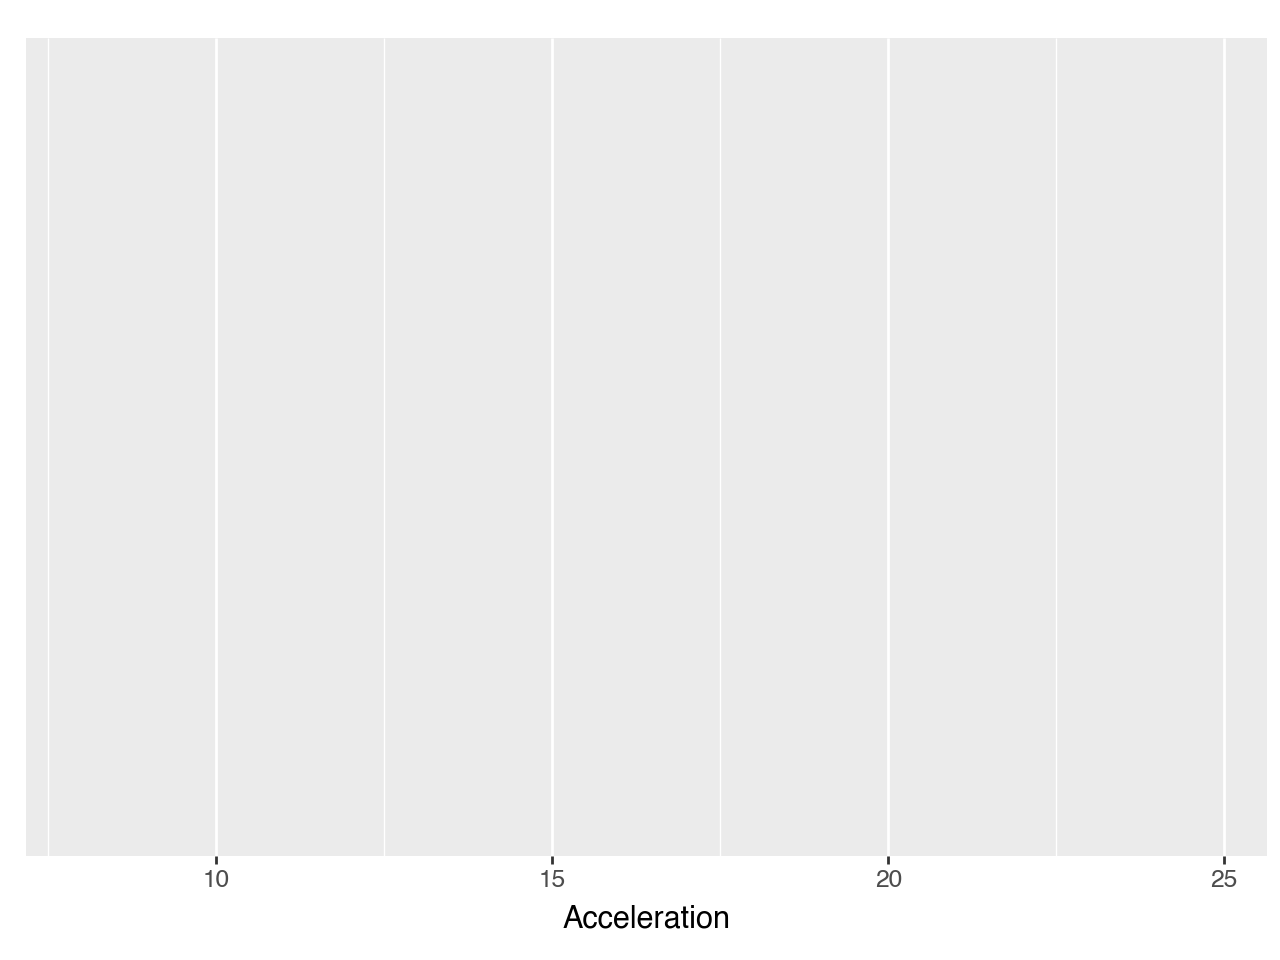

<Figure Size: (640 x 480)>

In [37]:
ggplot(cars, aes(x='Acceleration'))

The final part is to use some geometrical object, that gets calculated based on the mapping. ggplot does this by overriding the +-operator to add different geoms to the plot. Layer by layer. Once you understood this basic pattern, you have understood the grammar of graphics.

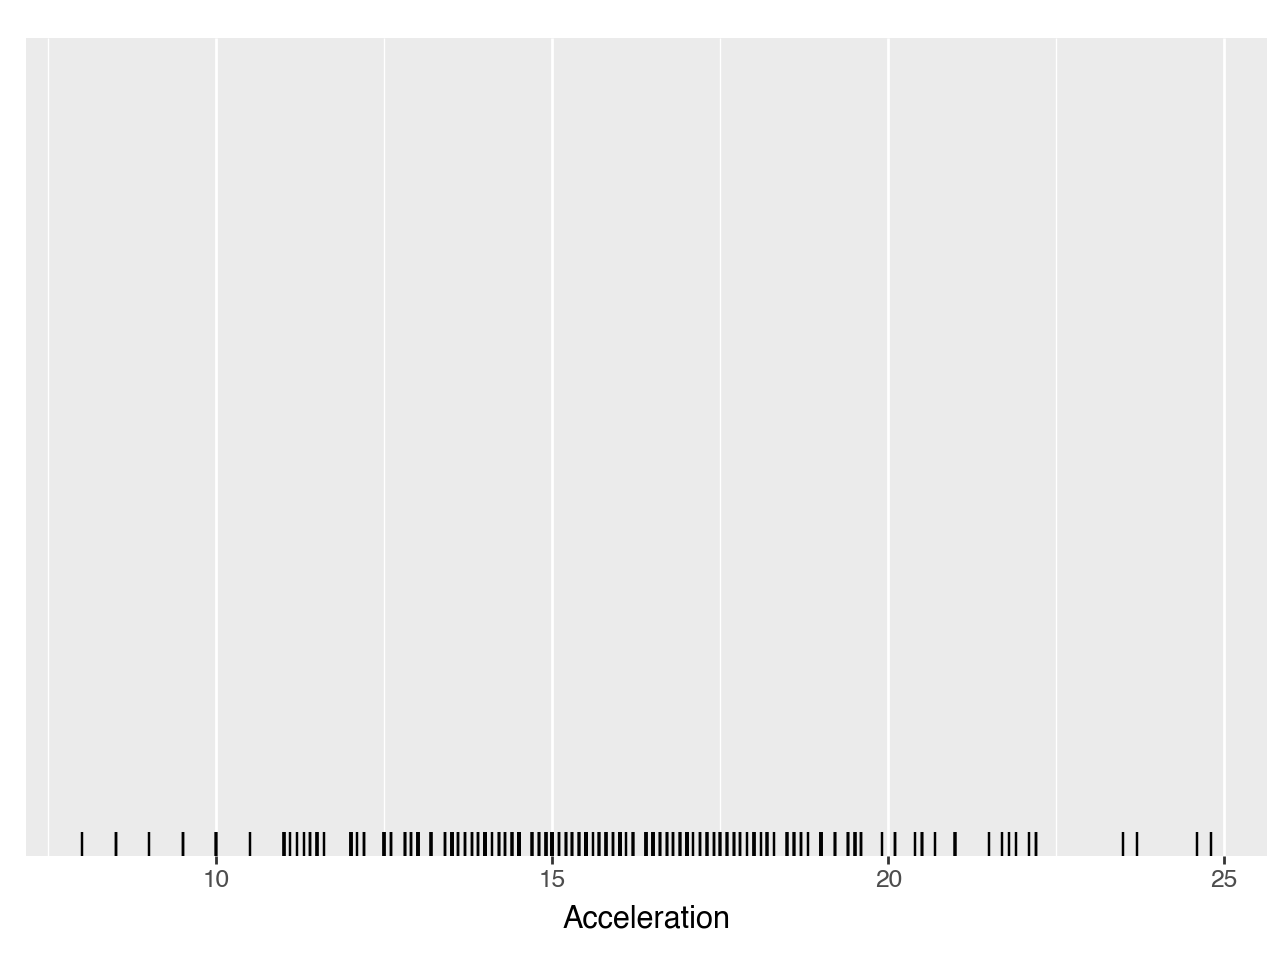

<Figure Size: (640 x 480)>

In [38]:
ggplot(cars, aes(x='Acceleration')) + geom_rug()

My recommandation for formating your ggplot code is to wrap the whole expresson in parantheses and then put each geom that you add on a separte line with the plus upfront. This way the code is very readable and you can simply comment out a single line to remove that layer from the plot, without touching the rest of the code.

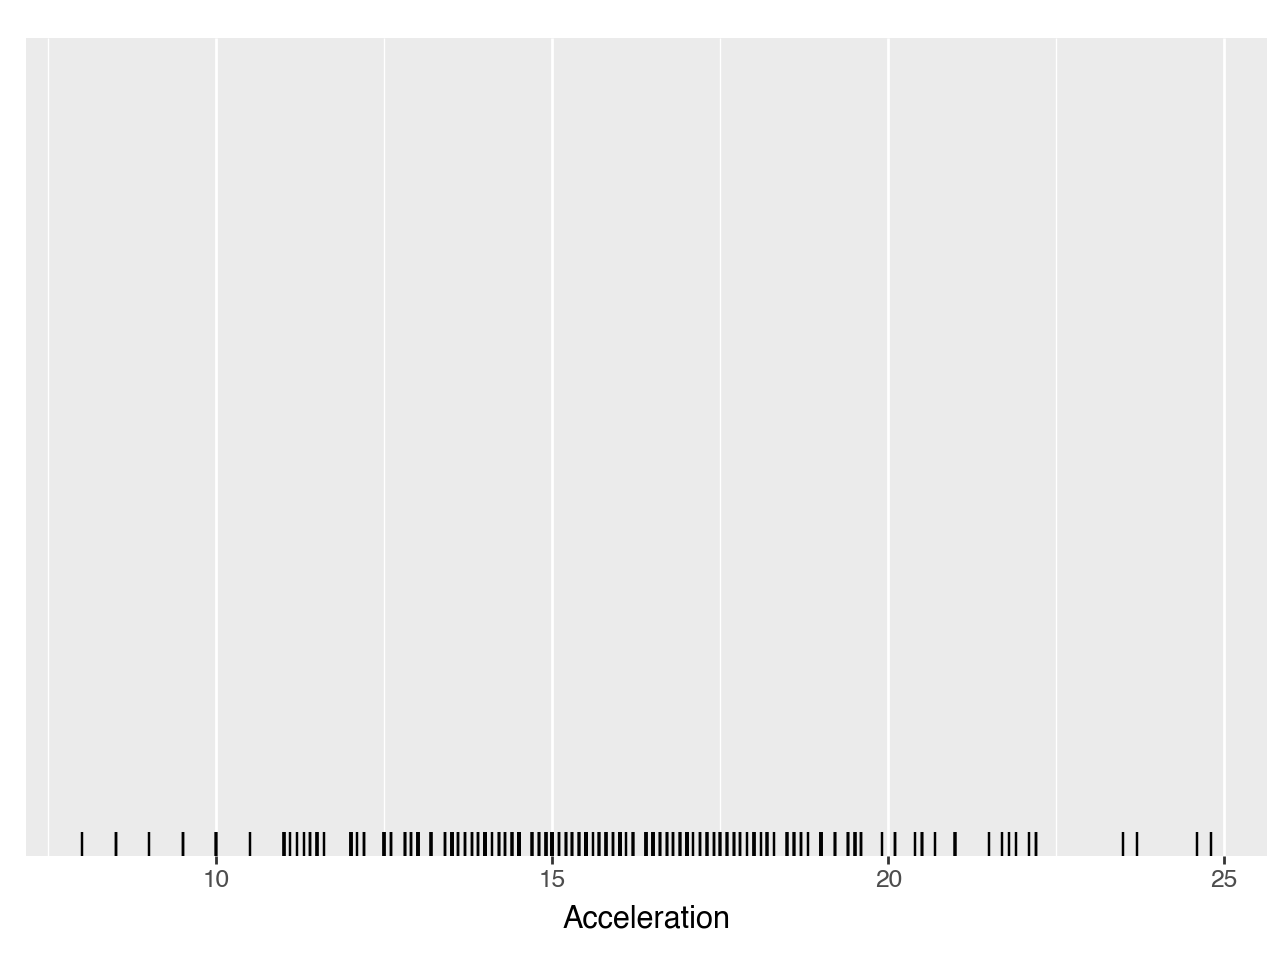

<Figure Size: (640 x 480)>

In [39]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_rug()
)

The power of the grammar of graphics is that you do not need to remember or search for a lot of configuration parameters of plotting functions. Instead, you can compose very complex plots out of simple expressions. For example, several geoms can be added to create more complex plots.

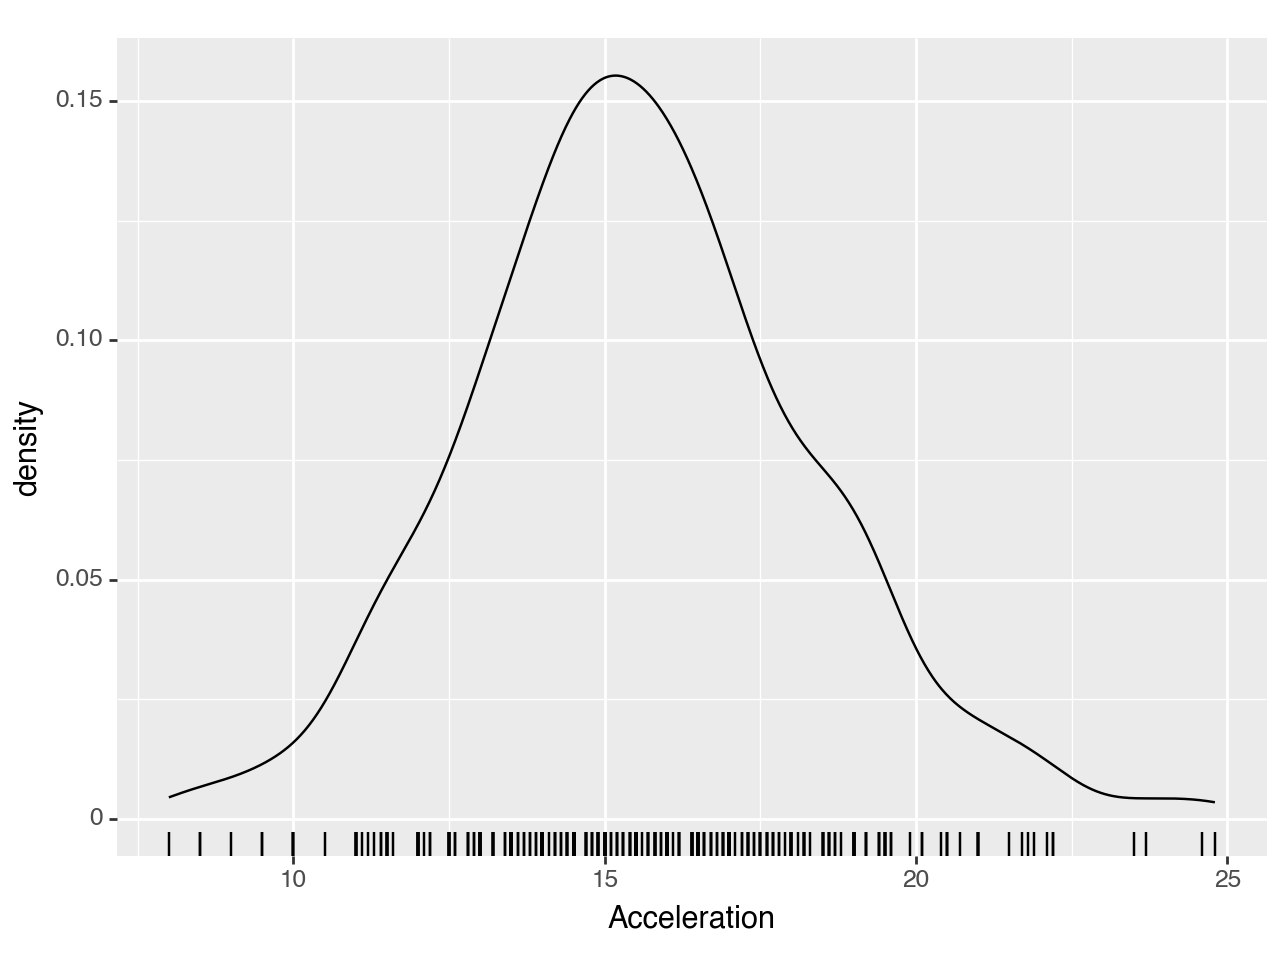

<Figure Size: (640 x 480)>

In [40]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_rug()
 + geom_density()
)

By default all added geoms will inherit the aes mapping of the plot. However, you can also override this by passing a new aes object. In practice this not so often needed though.

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 6 rows containing non-finite values.


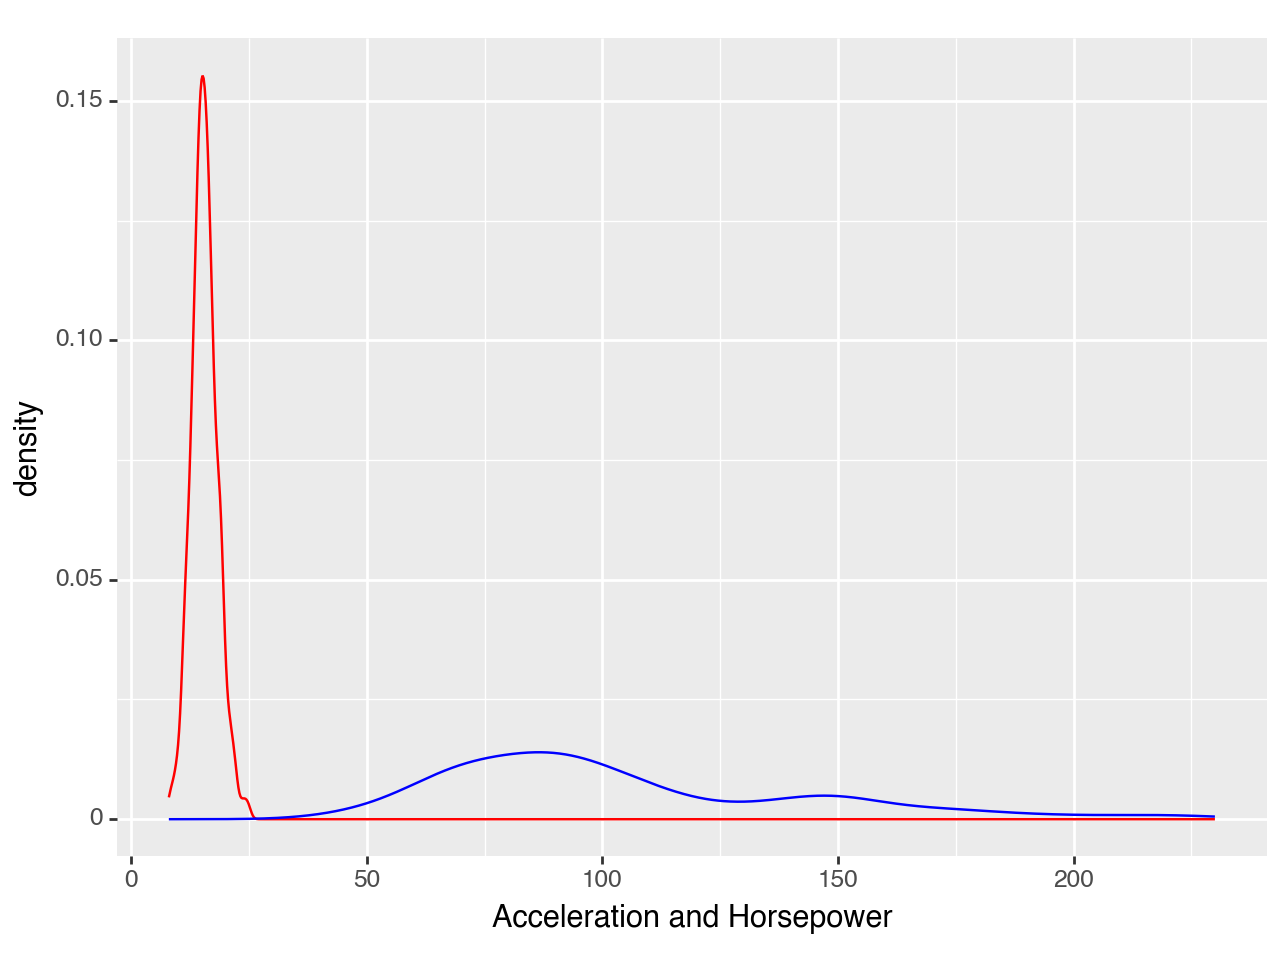

<Figure Size: (640 x 480)>

In [45]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_density(color='red') 
 + geom_density(aes(x='Horsepower'), color='blue') 
 + labs(x='Acceleration and Horsepower')
)

Now that we understood the basics of gglot let's dive into the dataset. First we look at the distribution of a single variable.

# Exploring a single variable

## Histograms

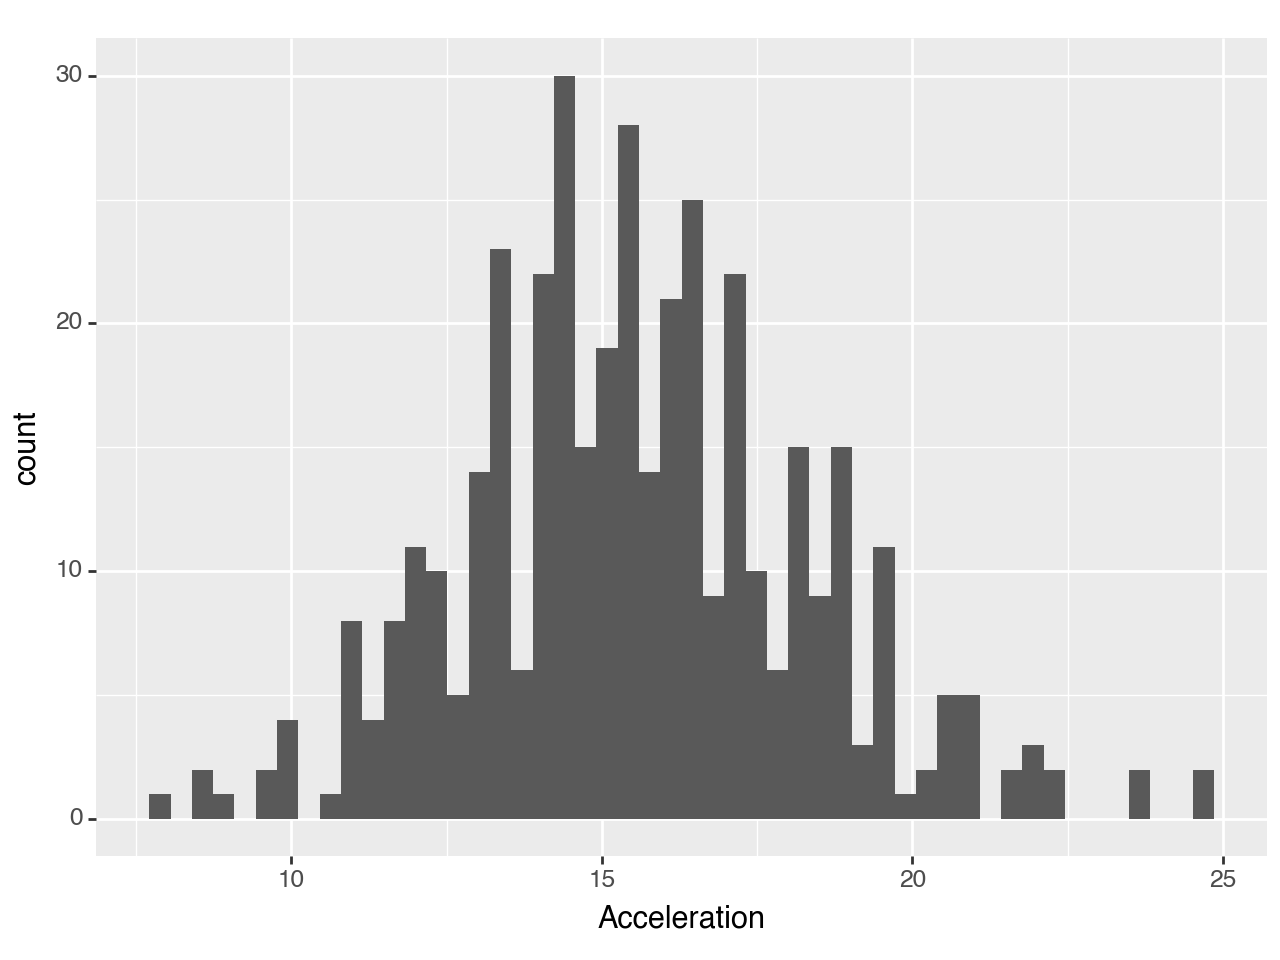

<Figure Size: (640 x 480)>

In [46]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_histogram(bins=50) #or specify binwidth
)

Many geoms are just combinations of less complex geoms and stats. For example a histogram is just a bar plot with a binning statistic.

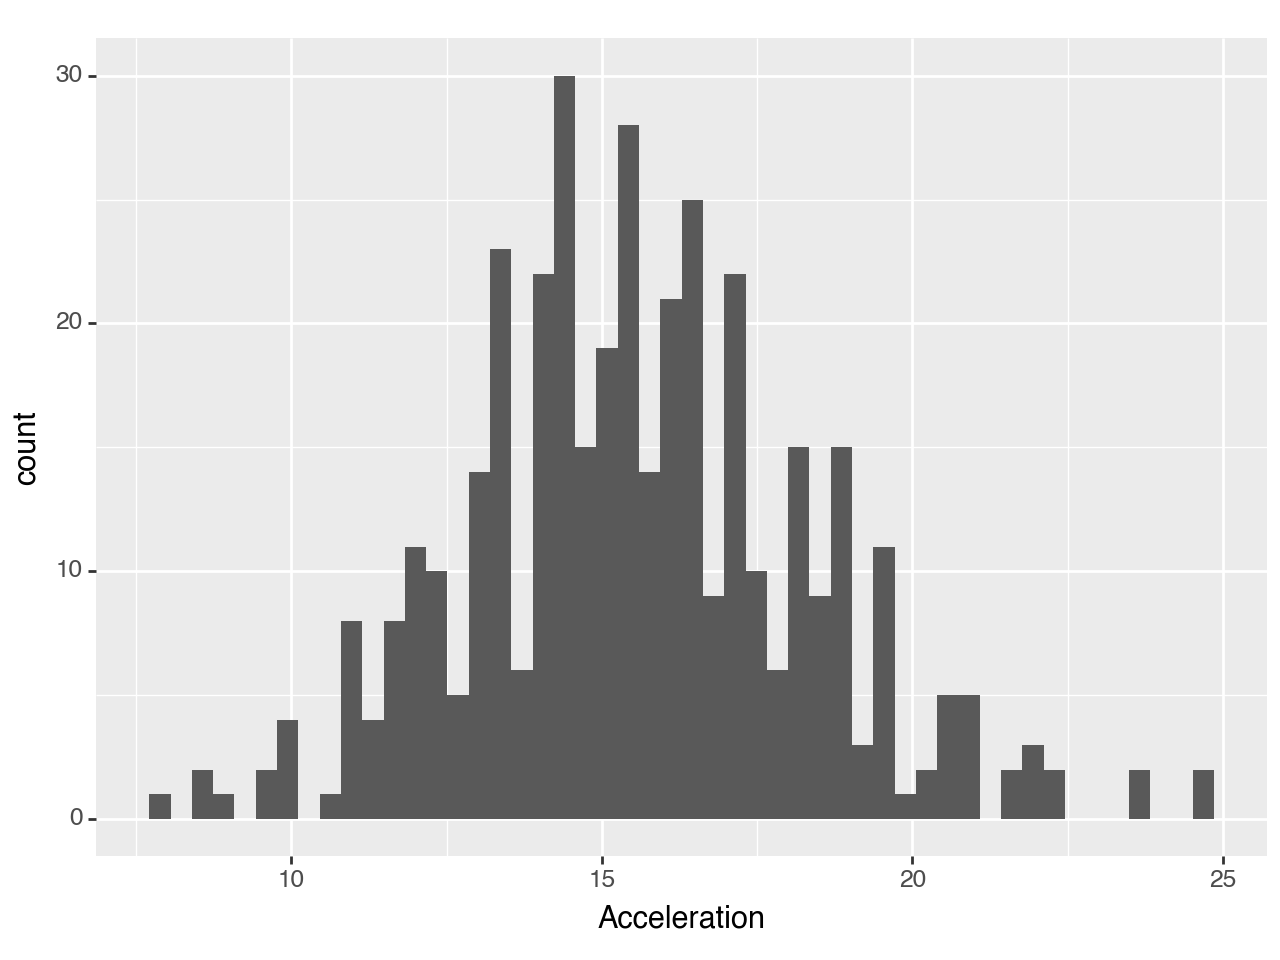

<Figure Size: (640 x 480)>

In [47]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_bar(stat=stat_bin(bins=50))
)

If you want to access variables that are not directly available from the dataset, but rather get calculated by some stat, you can do so by wrapping the variable into "stat()". This way we can get a normalized histogram.

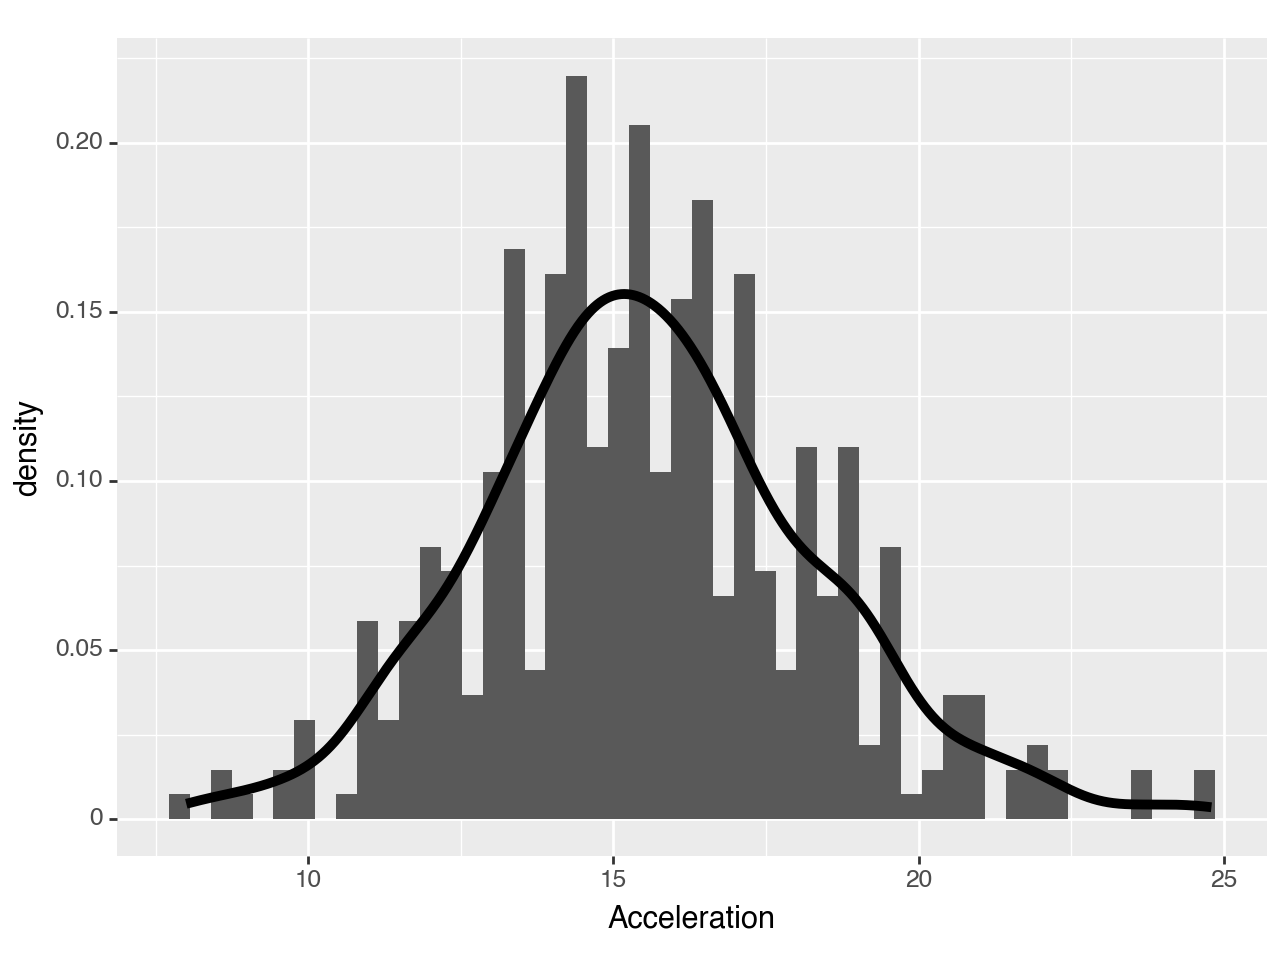

<Figure Size: (640 x 480)>

In [48]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_histogram(aes(y='stat(density)'), bins=50)
 + geom_density(size=2)
)

The strings in the expression can refer to:

- columns in the dataframe
- variables in the namespace
- aesthetic values (columns) calculated by the stat

## Boxplots

For making a boxplot, we need to specify the x variable. If we want to make a boxplot for a single variable, we need to specify some number.

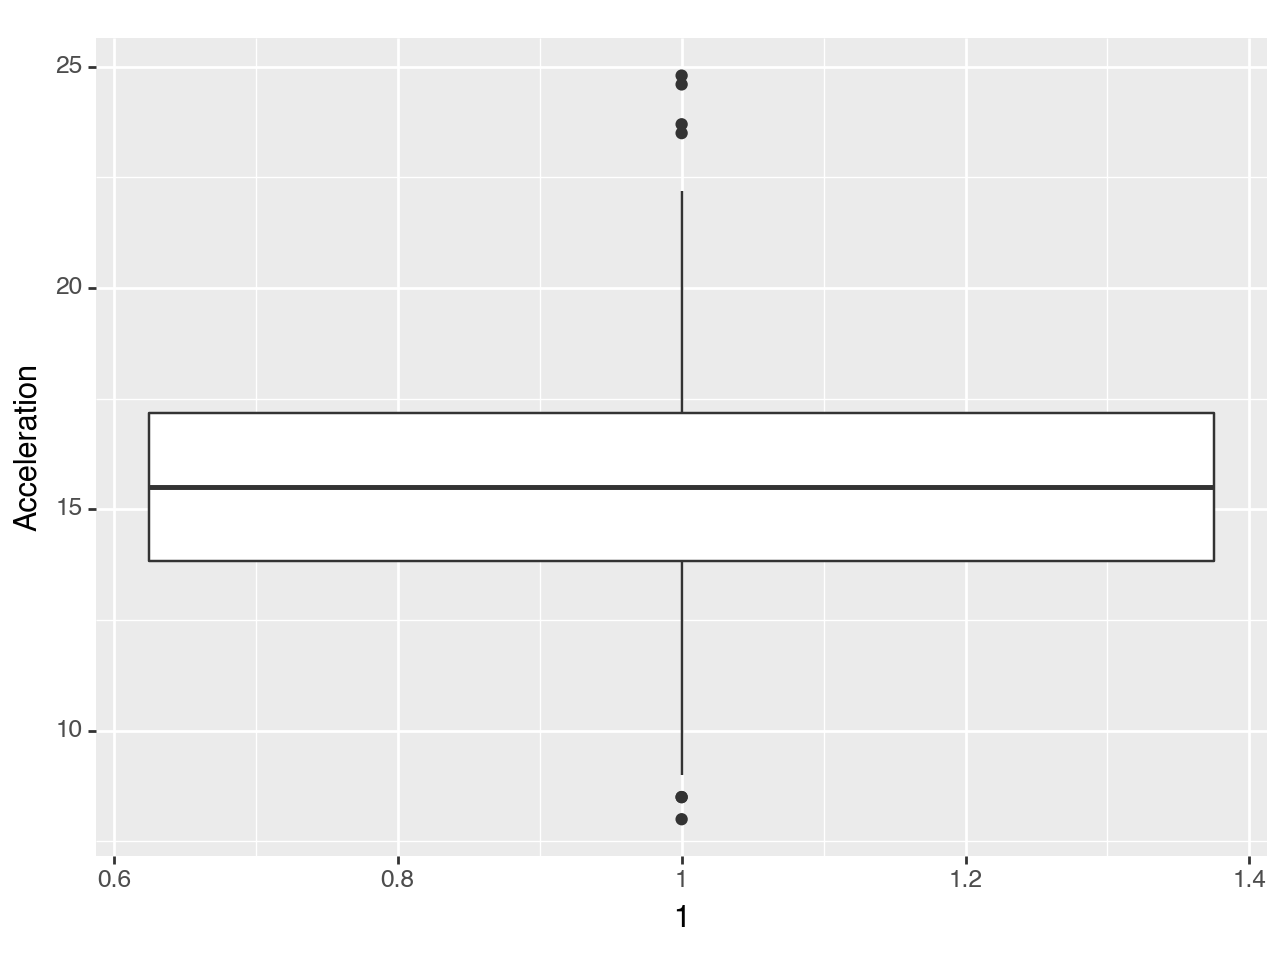

<Figure Size: (640 x 480)>

In [49]:
(ggplot(cars, aes(x=1, y='Acceleration')) 
 + geom_boxplot()
)

### Exercise

For the exercise we will turn to the barley dataset. The description on vega_datasets states

> The result of a 1930s agricultural experiment in Minnesota, this dataset contains yields for 10 different varieties of barley at six different sites. It was first published by agronomists F.R. Immer, H.K. Hayes, and L. Powers in the 1934 paper "Statistical Determination of Barley Varietal Adaption." R.A. Fisher's popularized its use in the field of statistics when he included it in his book "The Design of Experiments." Since then it has been used to demonstrate new statistical techniques, including the trellis charts developed by Richard Becker, William Cleveland and others in the 1990s.

In [51]:
!pip install vega_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 2.6 MB/s eta 0:00:00a 0:00:01


In [52]:
import vega_datasets

In [53]:
barley = vega_datasets.data.barley()
barley.head()

,yield,variety,year,site
0,27.00000,Manchuria,1931,University Farm
1,48.86667,Manchuria,1931,Waseca
2,27.43334,Manchuria,1931,Morris
3,39.93333,Manchuria,1931,Crookston
4,32.96667,Manchuria,1931,Grand Rapids


Make a histogram of the yield for all observations. Make the bins 5 units wide. Expand the cell below to see the solution

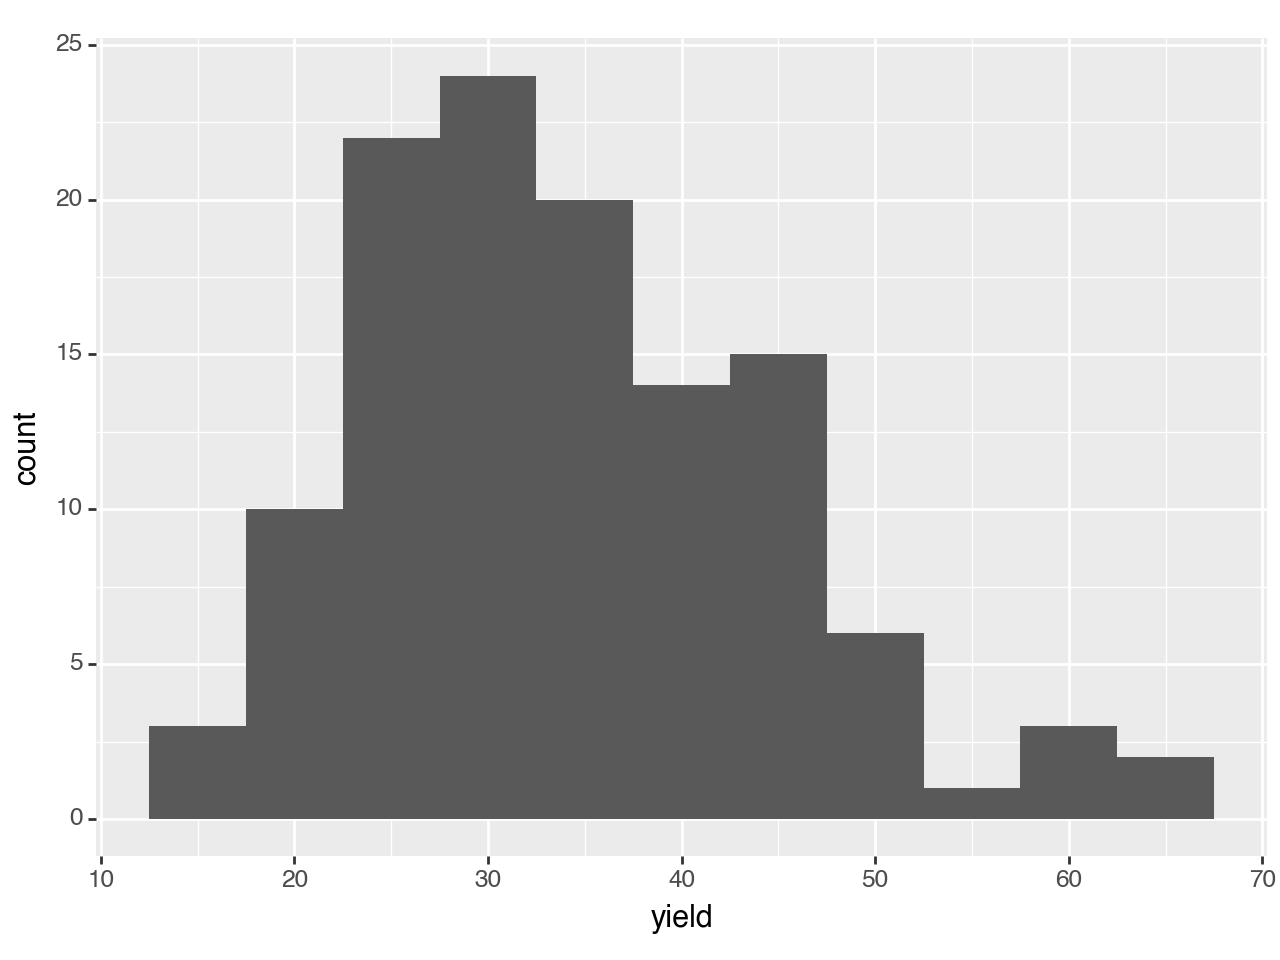

<Figure Size: (640 x 480)>

In [54]:
(ggplot(barley, aes(x='yield')) 
+ geom_histogram(binwidth=5)
)

## Exploring the relation of one continuous and one categorical variable

It is common to split the boxplot by a categorical variable. This is where more of the ggplot magic comes into play. Under the hood, ggplot performs a groupby operation on the x variable, applies the boxplot computations on every group and combines the results into a single plot.

### Boxplots

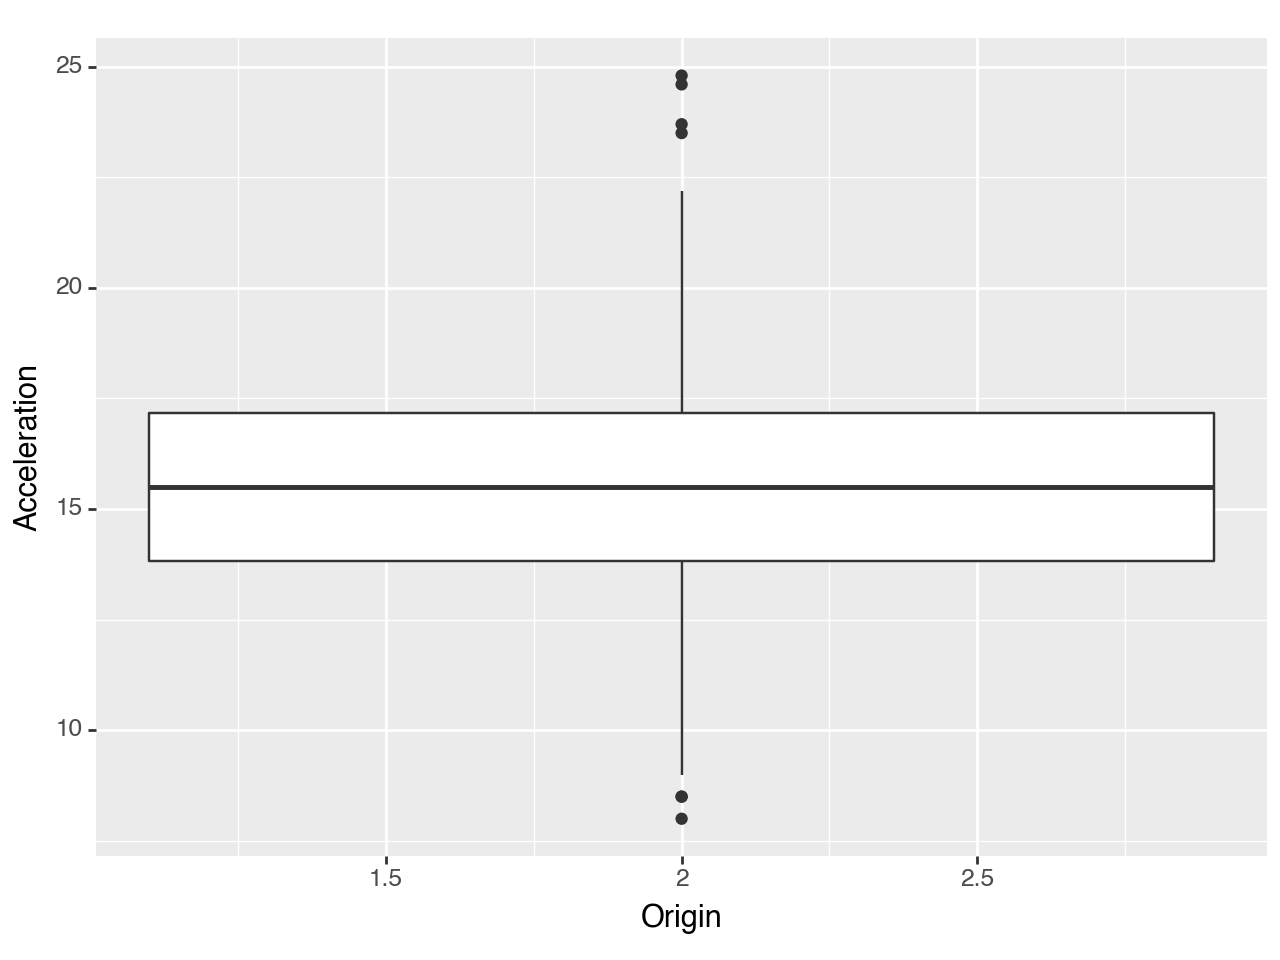

<Figure Size: (640 x 480)>

In [55]:
(ggplot(cars, aes(x='Origin', y='Acceleration')) 
 + geom_boxplot()
)

Sometimes it can make sense to "jitter", i.e. to randomly disturb, the original data points and put them on top of the boxplots. This gives you a feeling for the amount and distribution of the original data. Here jittering horizontally avoids plotting all the points on top of oneanother.

### Jittering

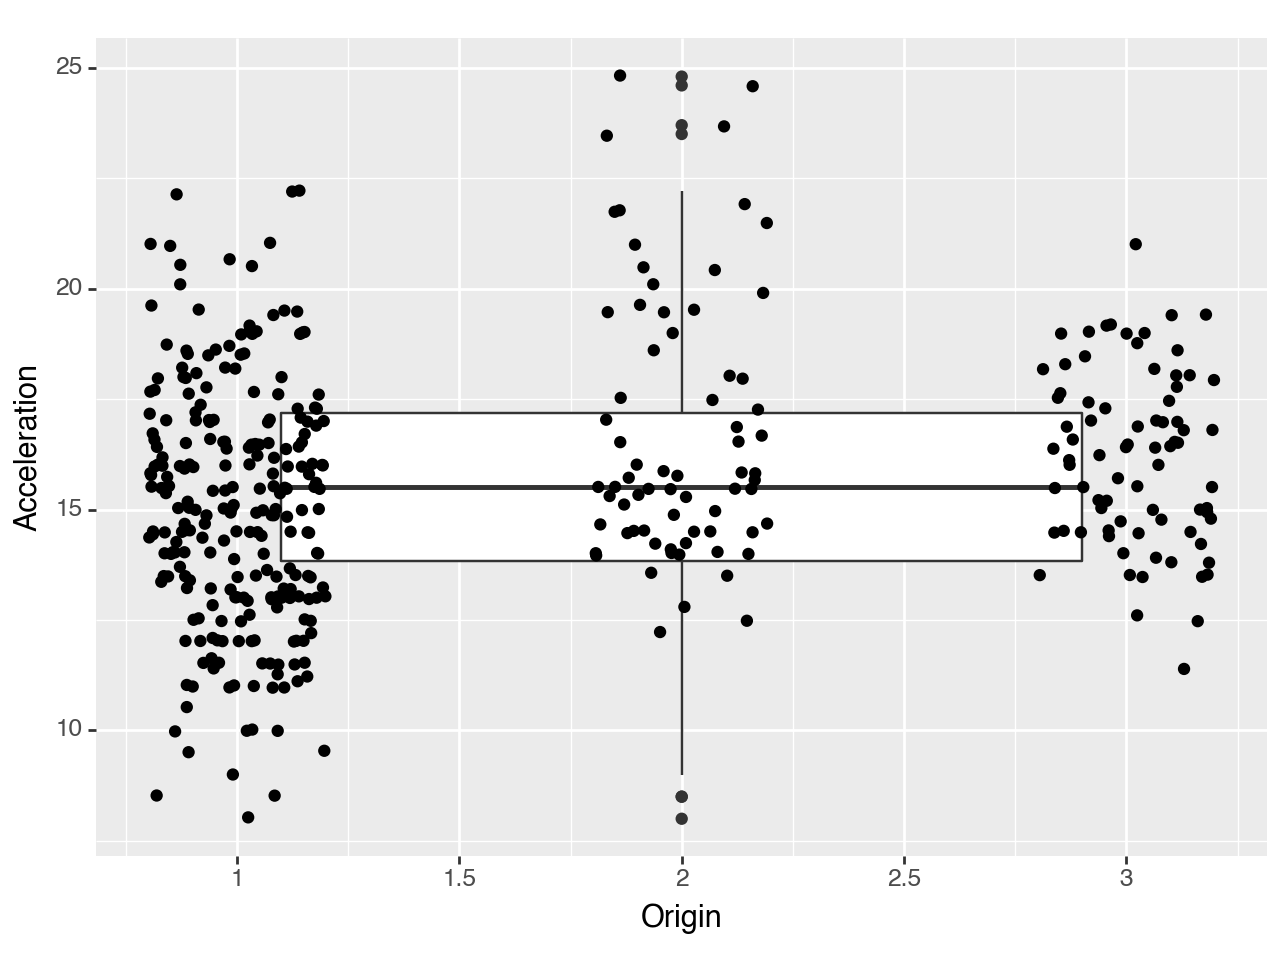

<Figure Size: (640 x 480)>

In [56]:
(ggplot(cars, aes(x='Origin', y='Acceleration')) 
 + geom_boxplot()
 + geom_jitter(width=0.2)
)

### Violinplots
Violinplots are nice alternative to boxplots.

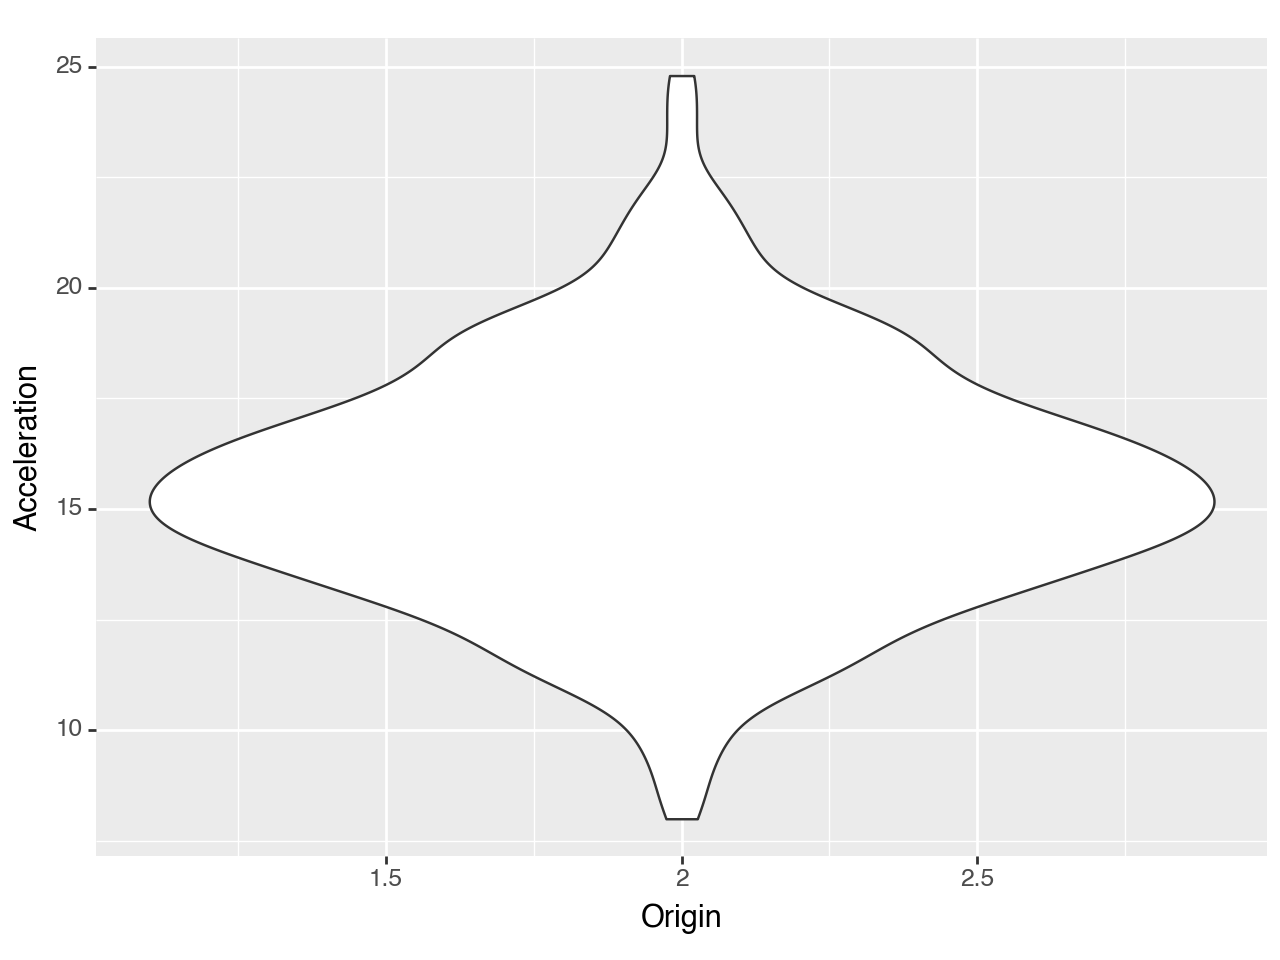

<Figure Size: (640 x 480)>

In [57]:
(ggplot(cars, aes(x='Origin', y='Acceleration')) 
 + geom_violin()
)

Adding stat_summary gives more information by displaying mean and standard deviation. This also demonstrates that not just every geom is by default associated with some stat, but also every stat is by default associated with some geom.

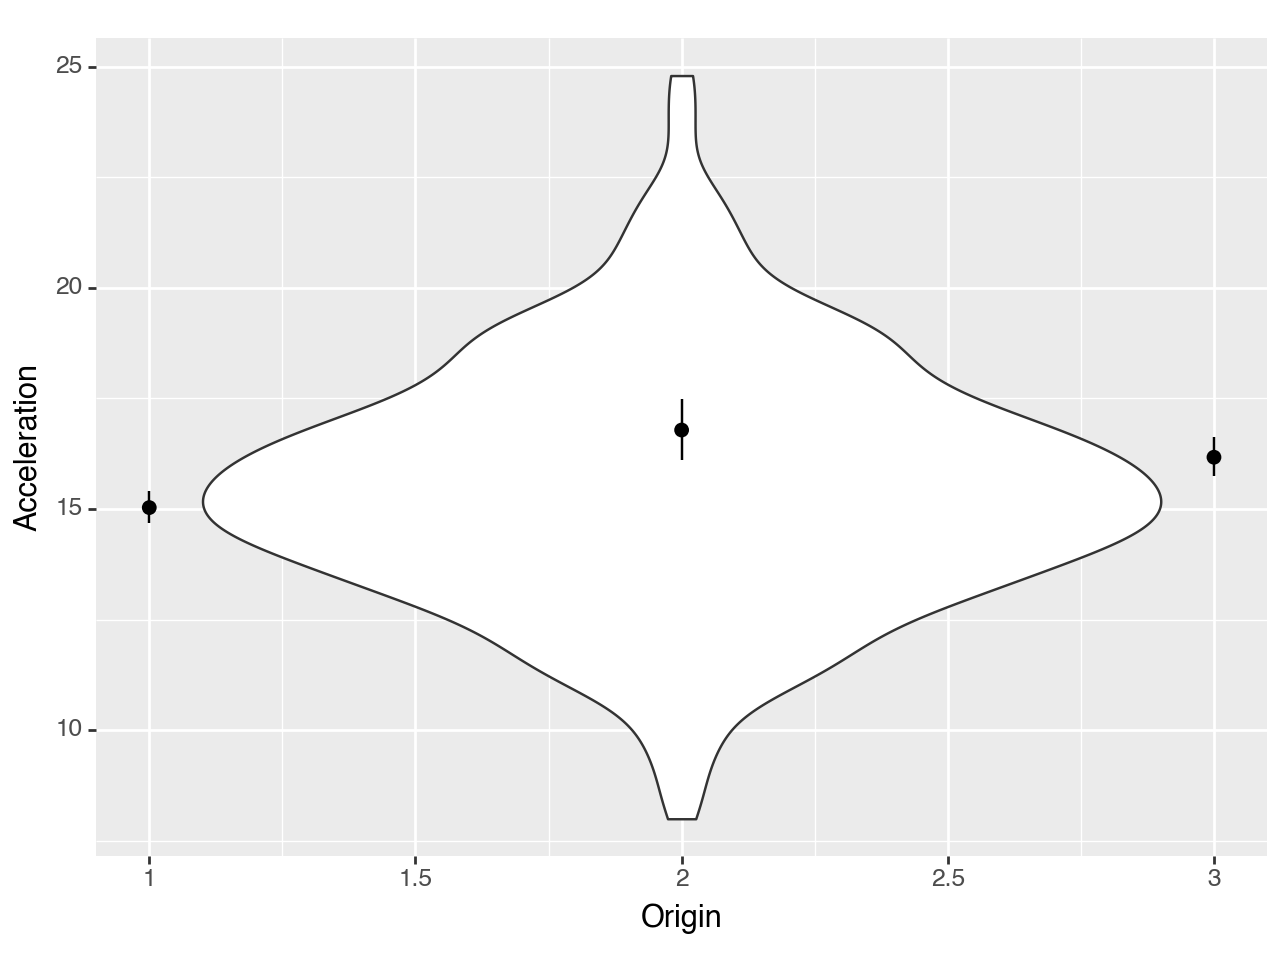

<Figure Size: (640 x 480)>

In [58]:
(ggplot(cars, aes(x='Origin', y='Acceleration')) 
 + geom_violin()
 + stat_summary()
)

Violinplots can be nicely combined with boxplots. This combines the strength of density estimation and point estimates, such as the median and quartiles.

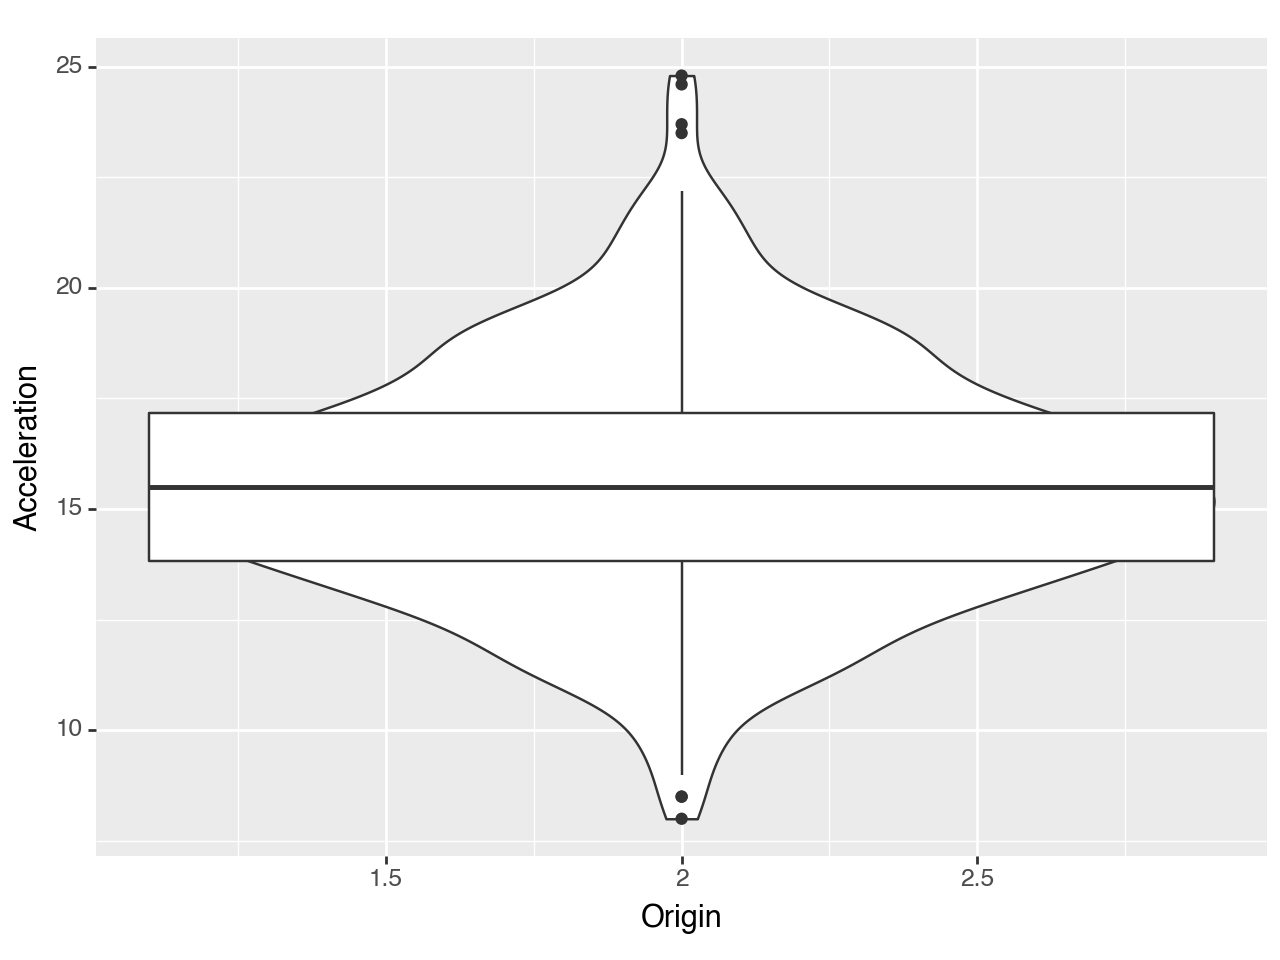

<Figure Size: (640 x 480)>

In [59]:
(ggplot(cars, aes(x='Origin', y='Acceleration')) 
 + geom_violin()
 + geom_boxplot(width=0.05)
)

Just looking at density split by a categorical variable is alsow very helpful.

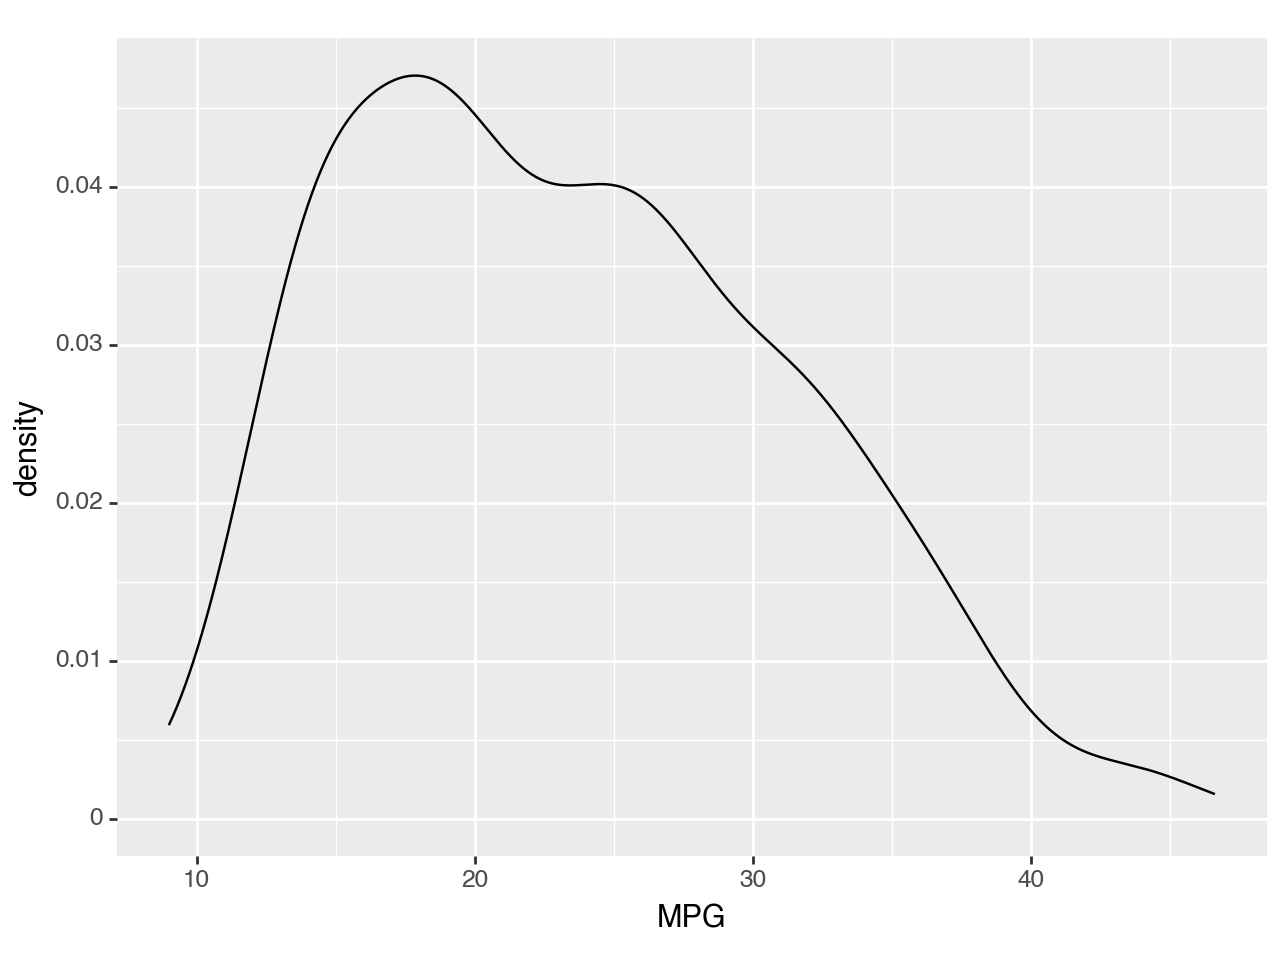

<Figure Size: (640 x 480)>

In [61]:
(ggplot(cars, aes(x='MPG', fill='Origin')) 
 + geom_density(alpha=0.4)
)

The same can be done with histograms.

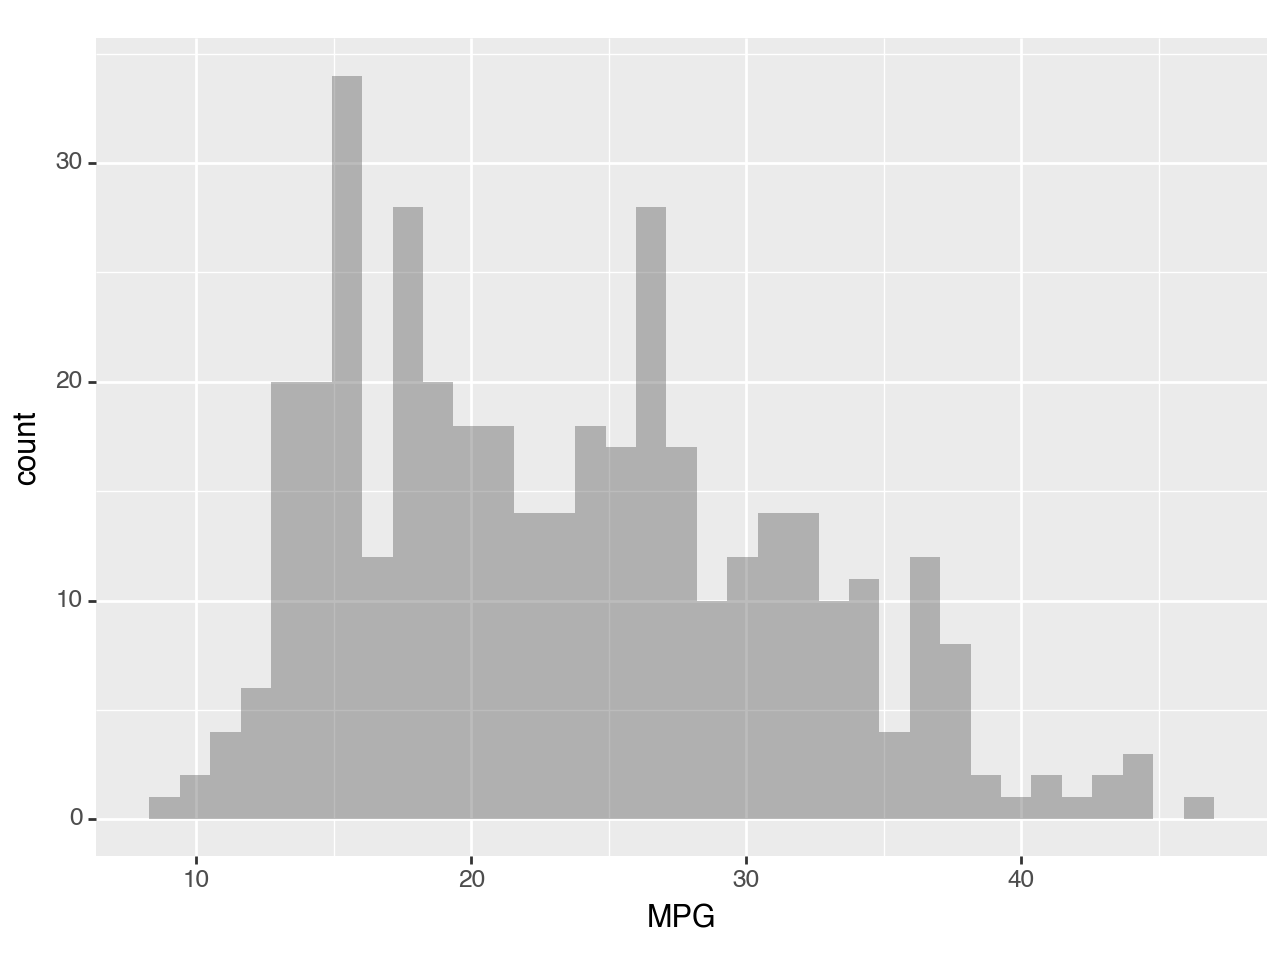

<Figure Size: (640 x 480)>

In [63]:
(ggplot(cars, aes(x='MPG', fill='Origin')) 
 + geom_histogram(alpha=0.4, bins=35, position='identity')
)

Let's look at a comparision to matplotlib, to see how much code we save by using ggplot.

In [69]:
import numpy as np
import matplotlib.pyplot as plt

var_to_plot = 'MPG'
var_to_split = 'Origin'
bins = np.histogram_bin_edges(cars[var_to_plot], bins=35)
fig, ax = plt.subplots(figsize=(12, 8))
for name, group in cars.groupby(var_to_split):
    ax.hist(var_to_plot, bins=bins, data=group, label=name, alpha=0.4)
ax.set(xlabel=var_to_plot, ylabel='count')
ax.legend(title=var_to_split)

We see that ggplot takes care of a lot of logic for us. The plot even looks a bit different, becaues ggplot does a few things under the hood to improve the placement of the bins.

## Exploring the relation of two continuous variables
Let's now explore the interaction of two continuous variables. A standard way of doing this is the scatter plot.

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 6 rows containing missing values.


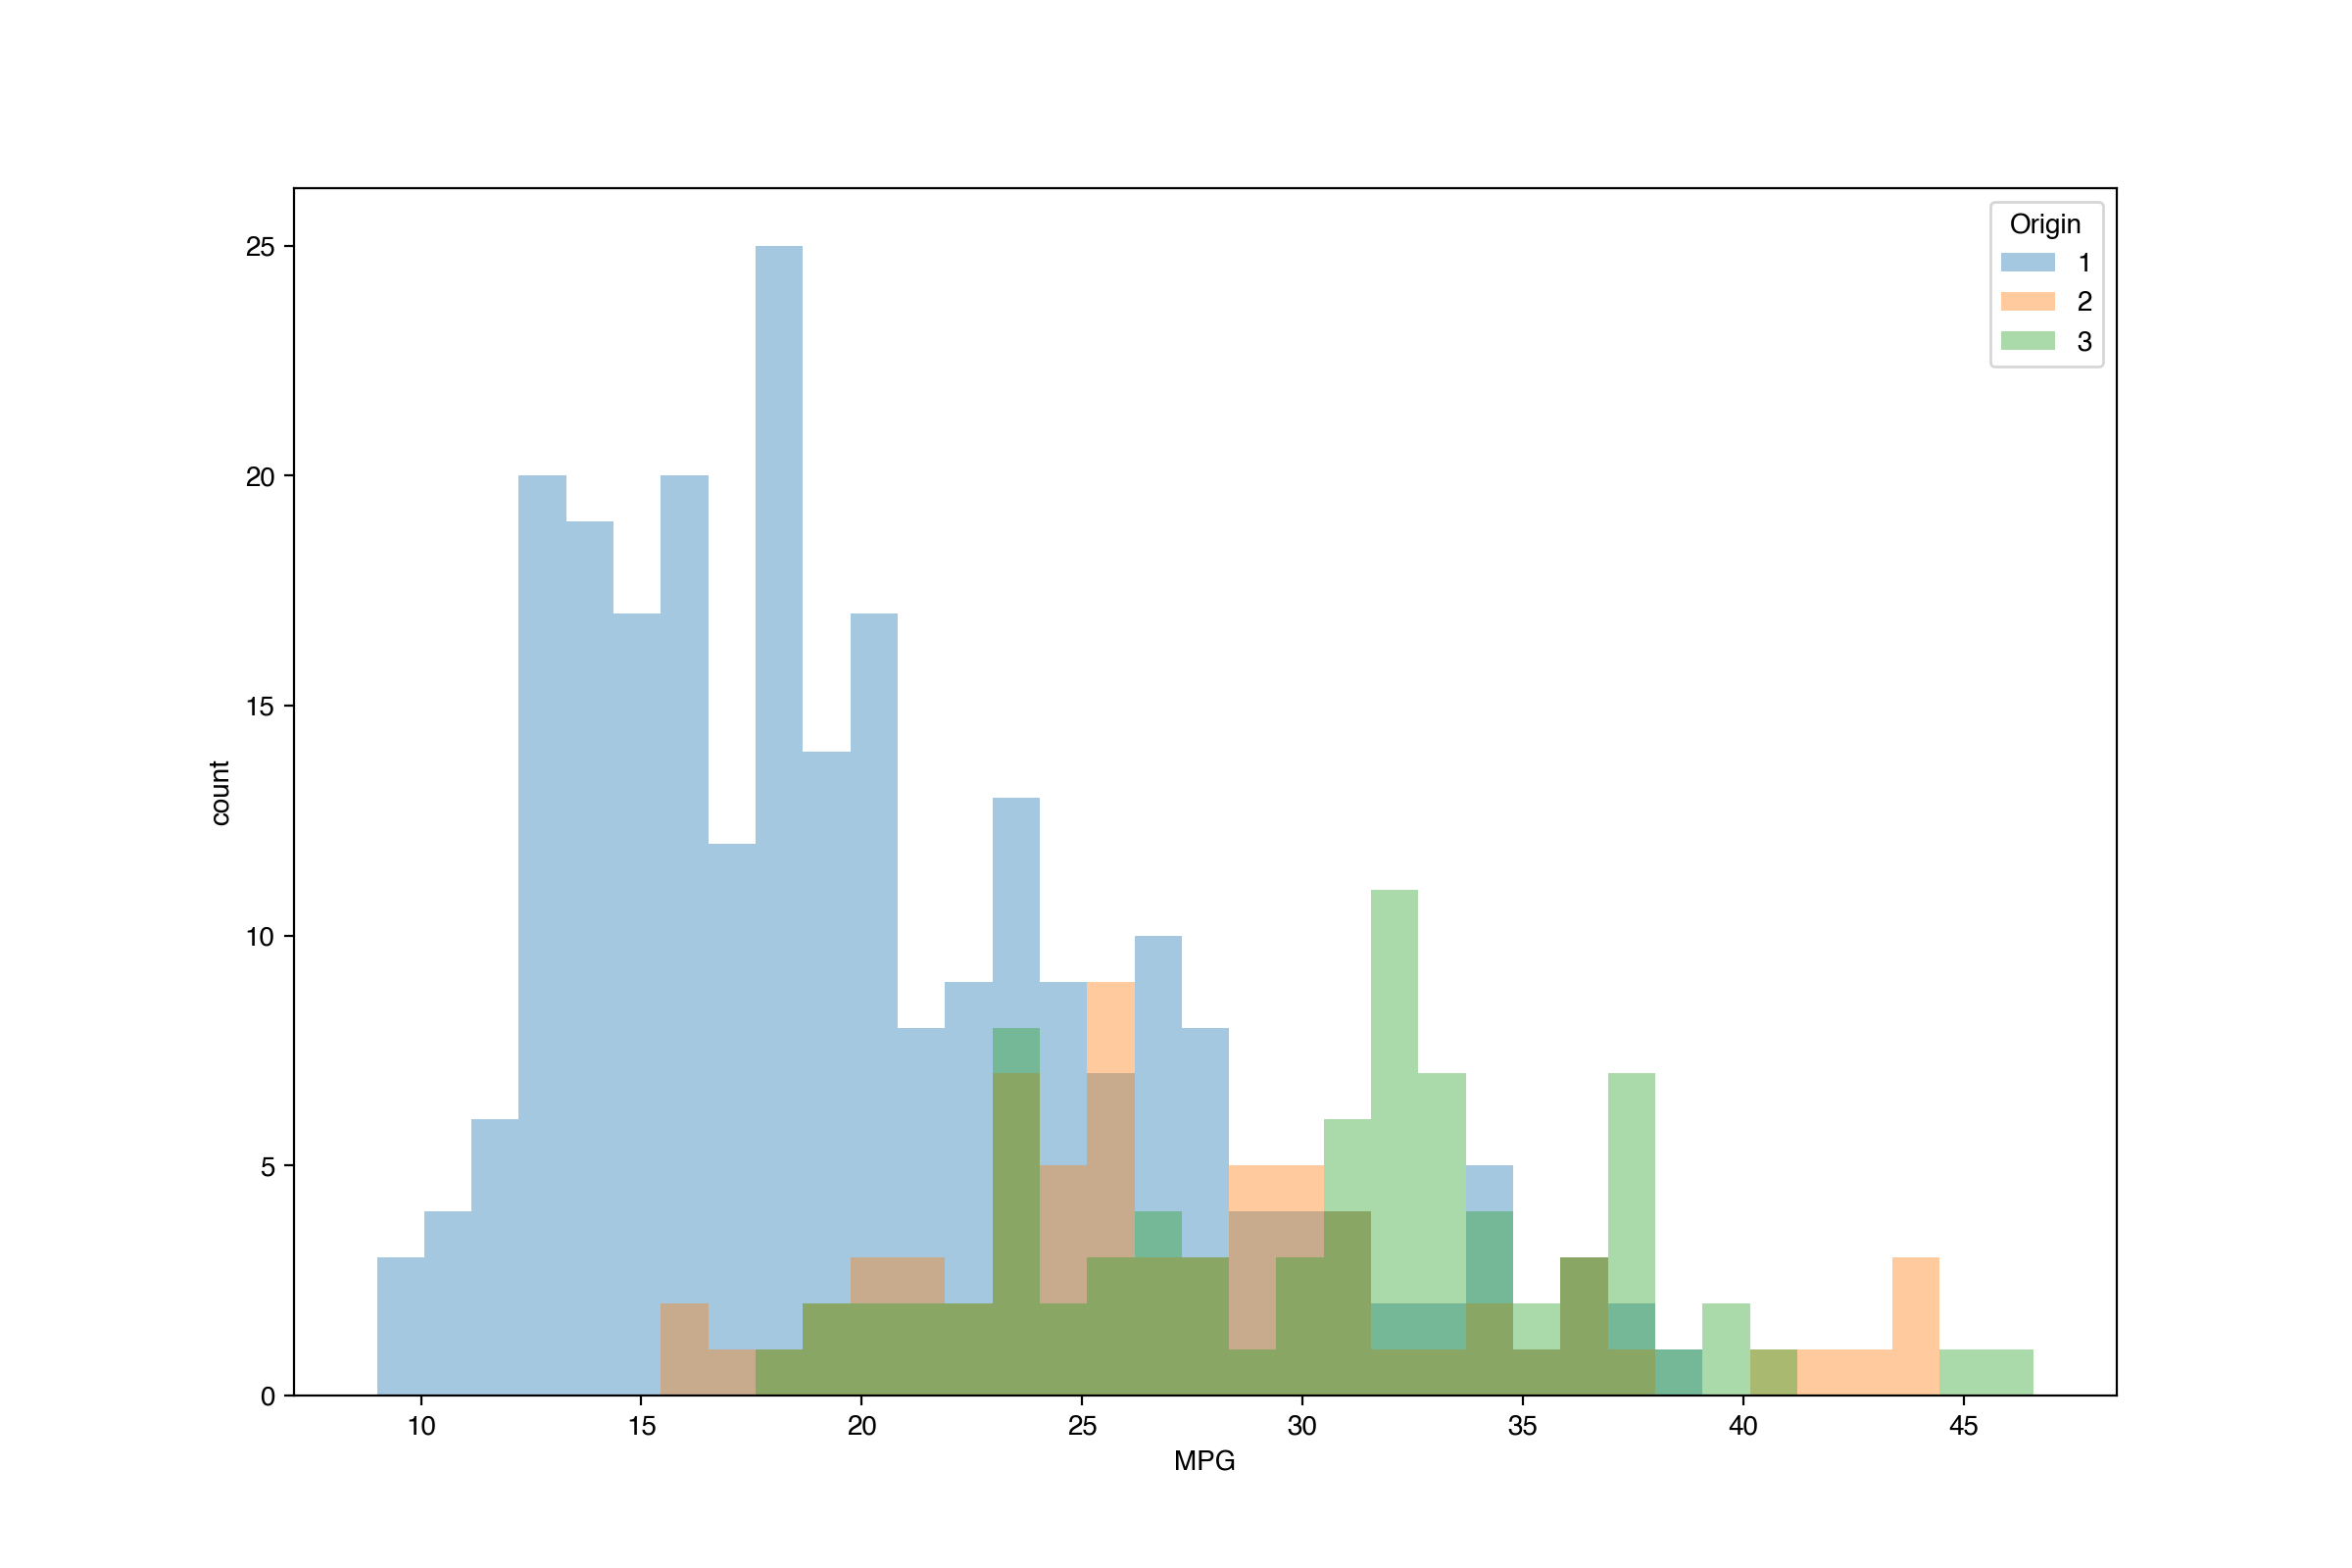

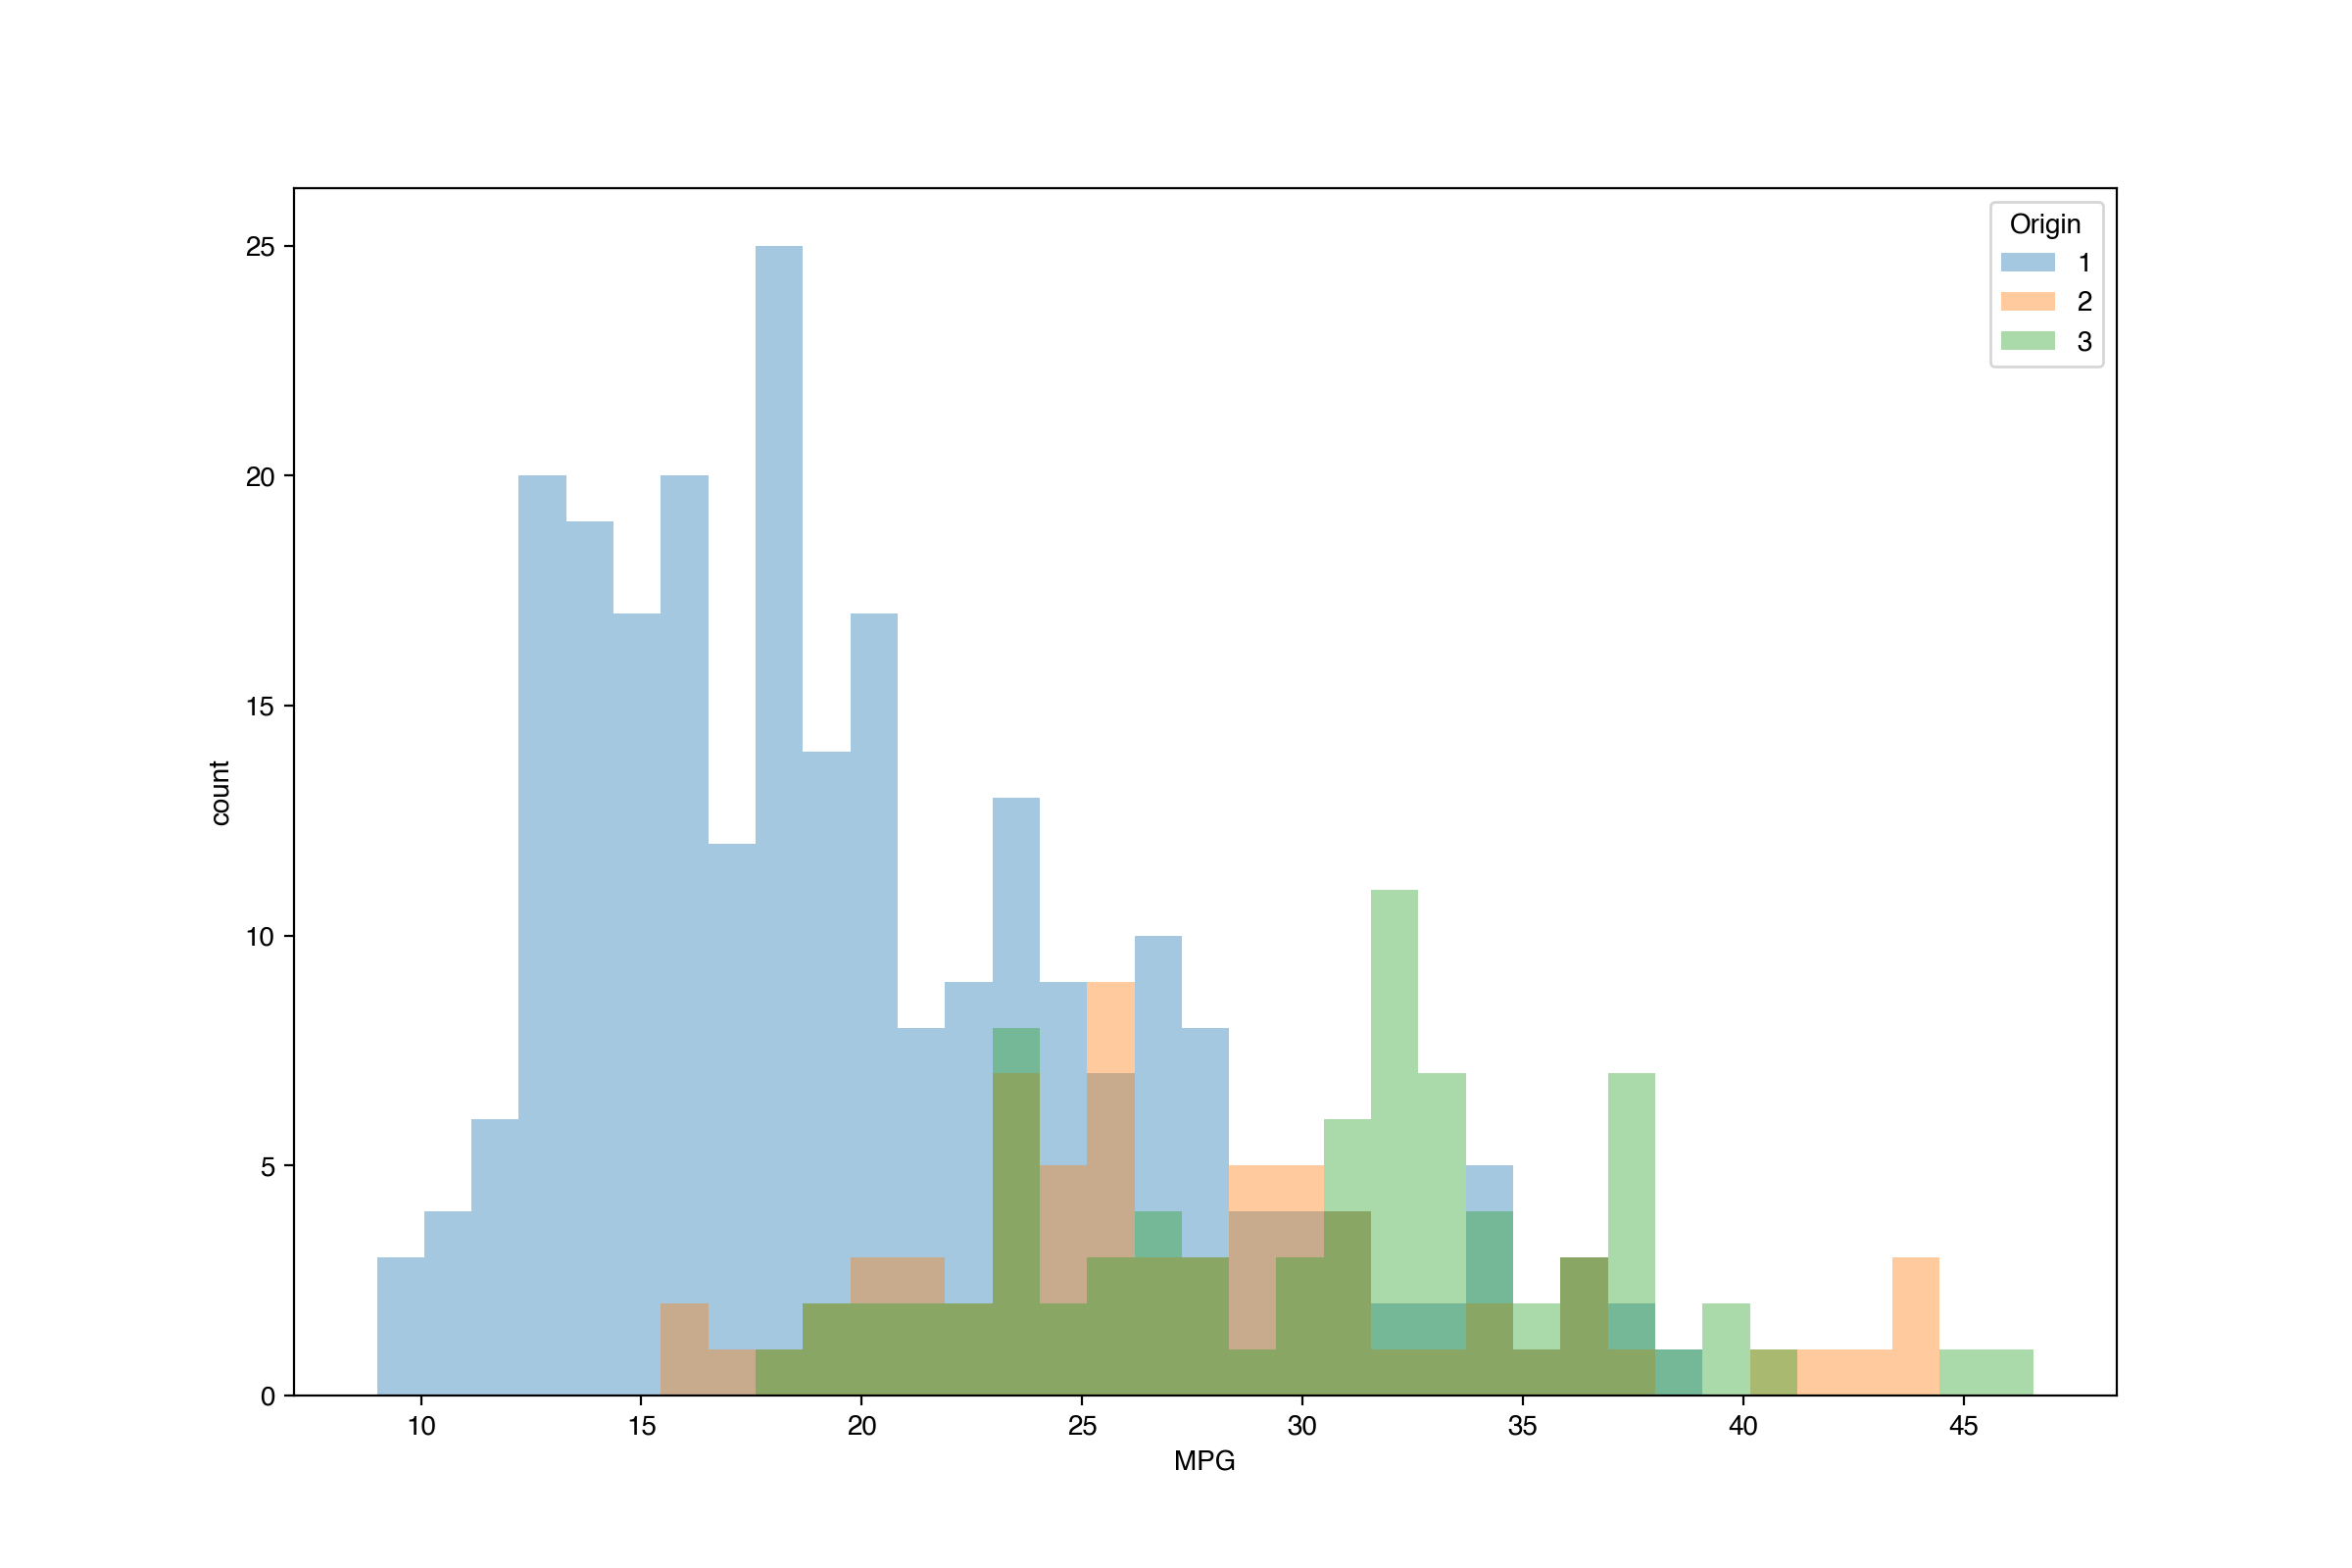

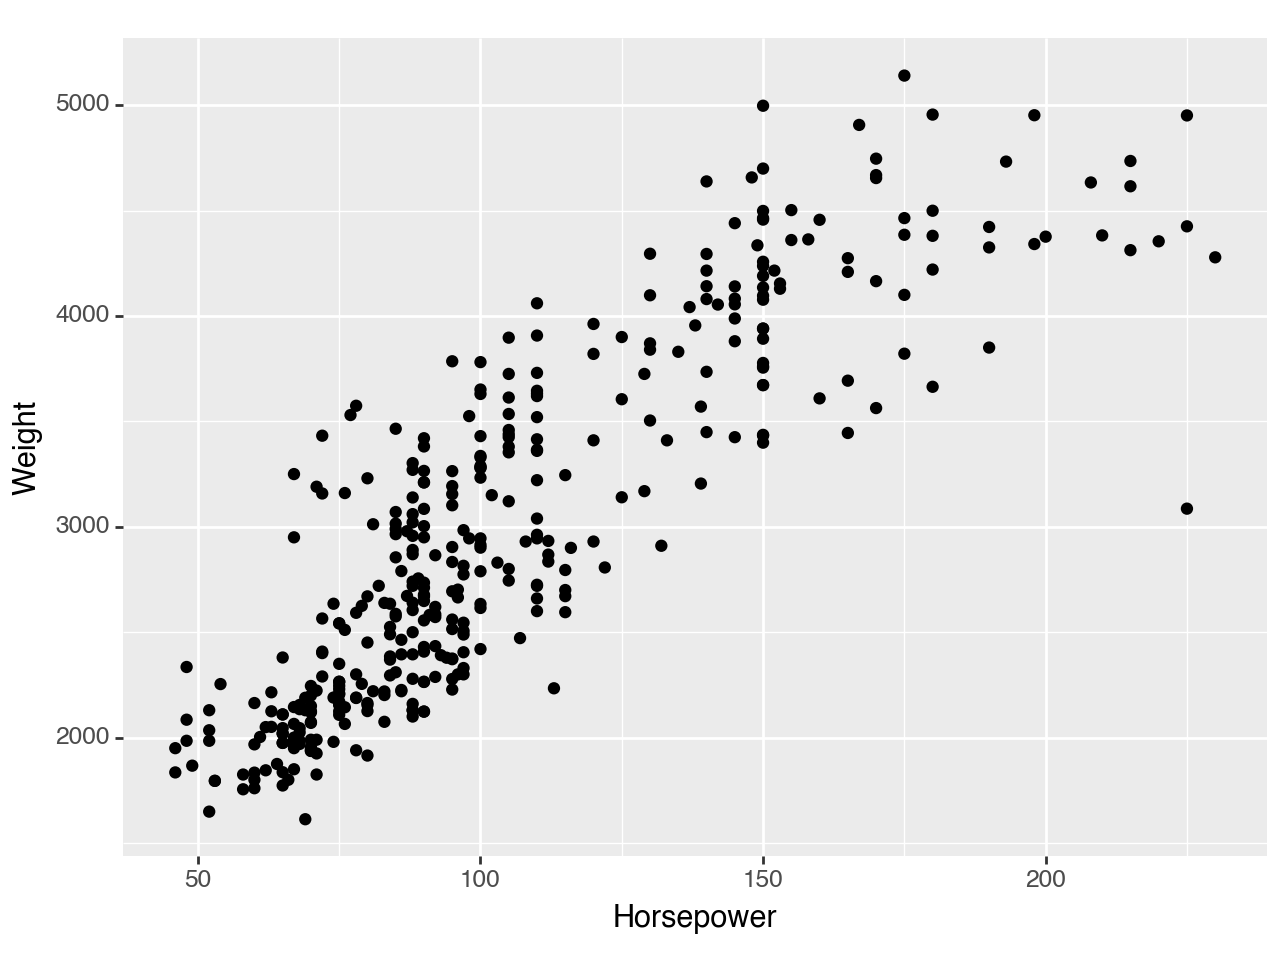

<Figure Size: (640 x 480)>

In [71]:
(ggplot(cars, aes(x='Horsepower', y='Weight')) 
 + geom_point()
)

We can easily plot the corresponding labels. Only do this for a small amount of points though.

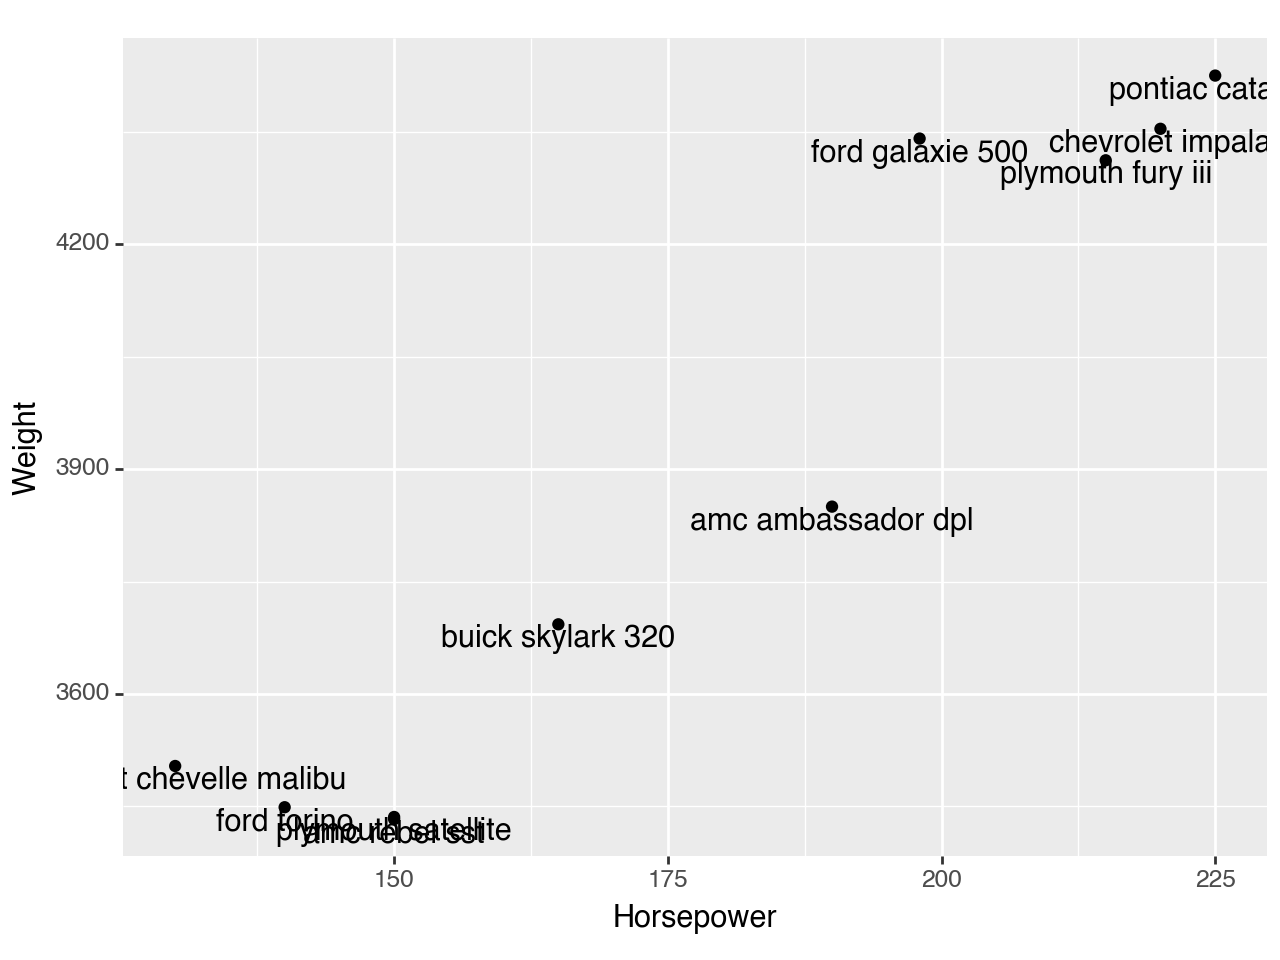

<Figure Size: (640 x 480)>

In [74]:
(ggplot(cars.iloc[:10], aes(x='Horsepower', y='Weight', label='Car Name')) 
 + geom_point()
 + geom_text(va='top')
)

Scatterplots sometimes suffer from overplotting. That means that points overlap with each other so we cannot distinguish them anymore. A stat that avoids this is a two dimensional kernel density estimate.

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density_2d : Removed 6 rows containing non-finite values.


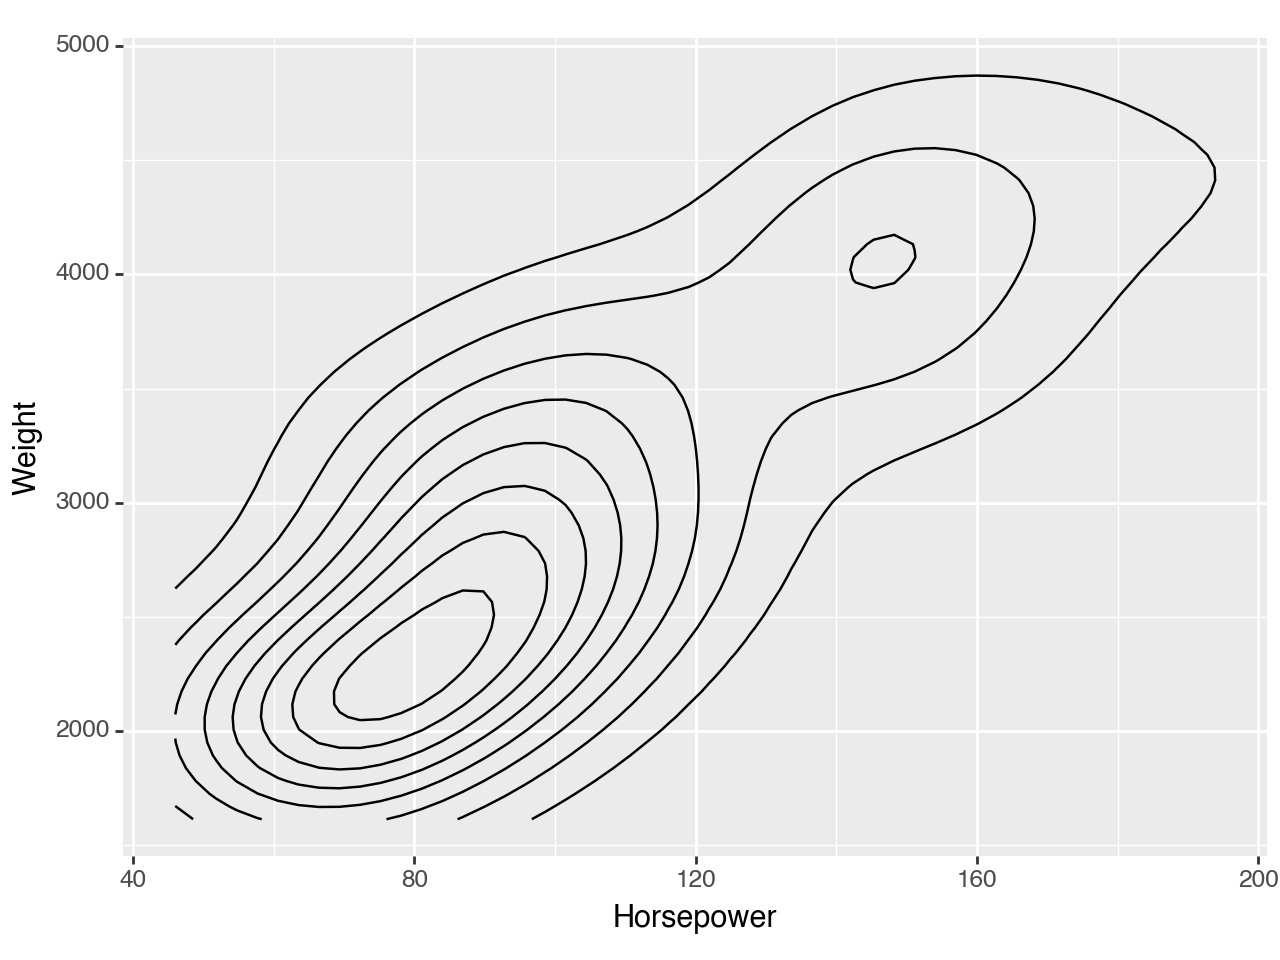

<Figure Size: (640 x 480)>

In [76]:
(ggplot(cars, aes(x='Horsepower', y='Weight')) 
 + geom_density_2d(levels=10) # use the levels arg to specify number of levels,
)

Again, using "stat()" is often helpful. We can for example add a colored filling to our density plot.

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density_2d : Removed 6 rows containing non-finite values.


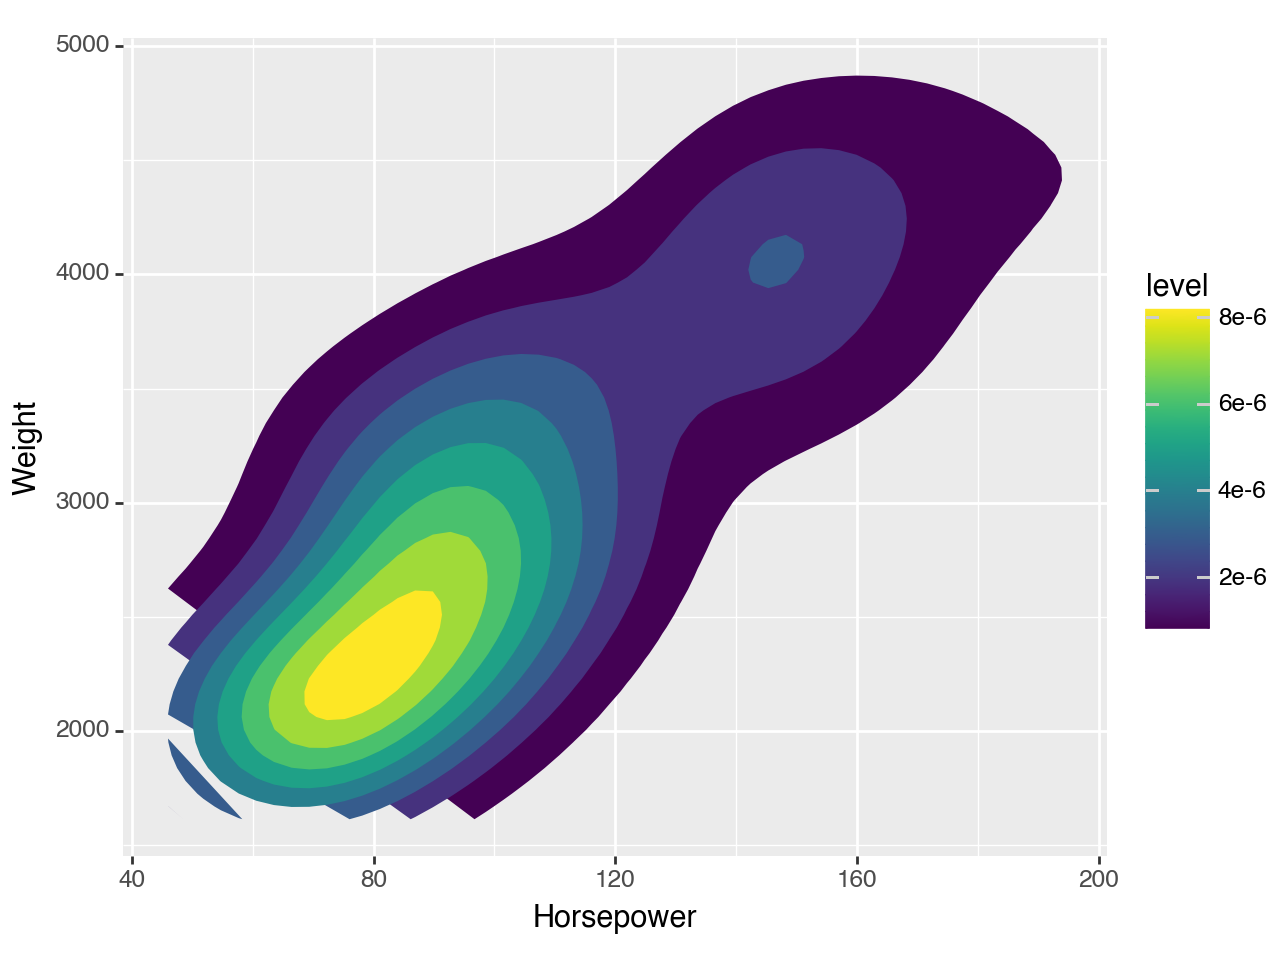

<Figure Size: (640 x 480)>

In [78]:
(ggplot(cars, aes(x='Horsepower', y='Weight')) 
 + stat_density_2d(geom='polygon', mapping=aes(fill='stat(level'), levels=10)
)

Another way of avoiding overplotting is to use a countplot.

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_sum : Removed 6 rows containing non-finite values.


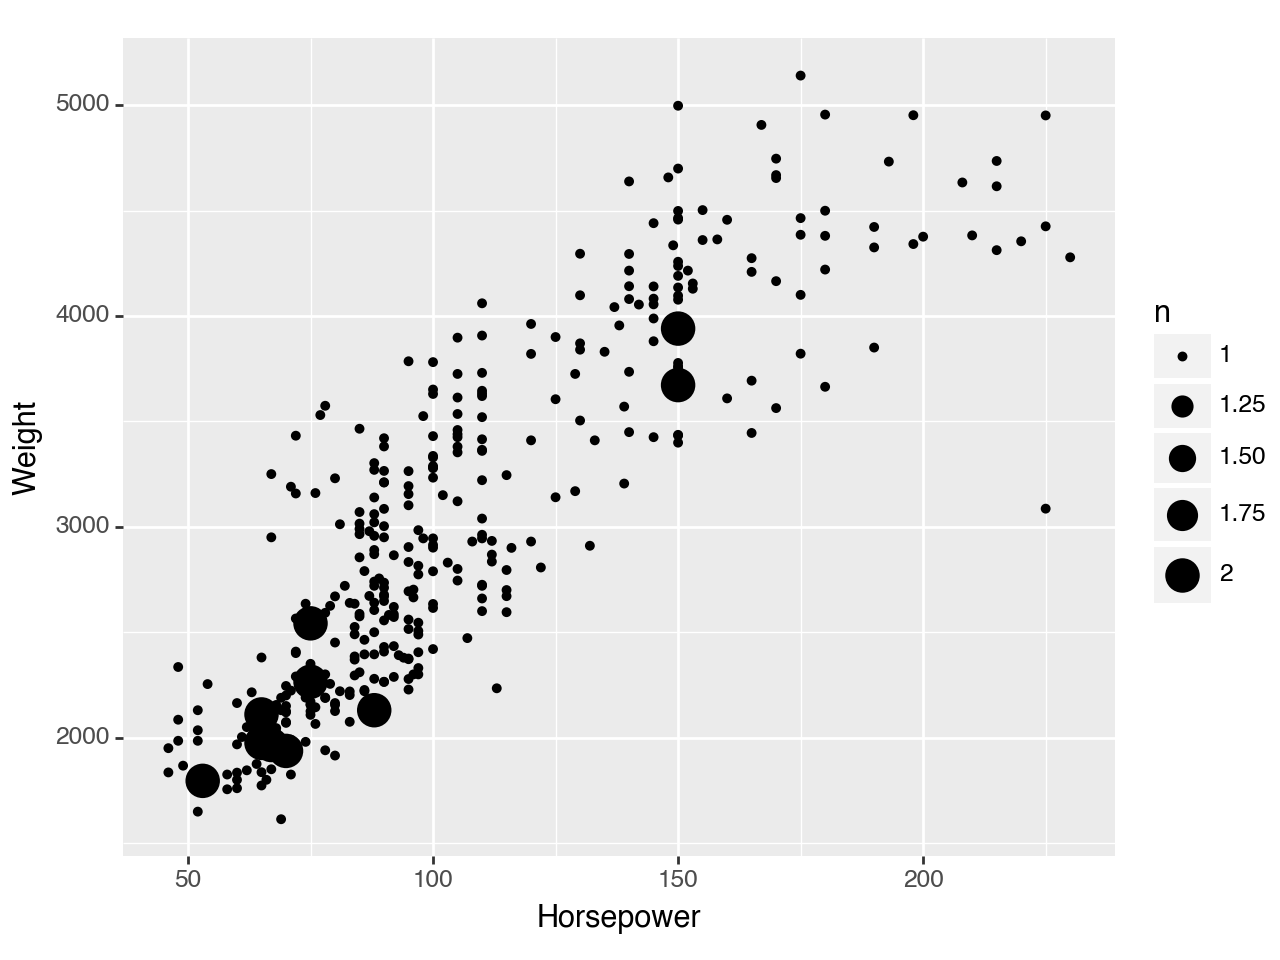

<Figure Size: (640 x 480)>

In [80]:
(ggplot(cars, aes(x='Horsepower', y='Weight')) 
 + geom_count()
)

## Regression

With regression lines we can easily add more information to scatterplots. By default geom_smooth uses loess smoothing, i.e. local regression. In a nutshell, loess computes regression lines in a rolling window and then combines them into a smooth curve.

/opt/homebrew/lib/python3.11/site-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 6 rows containing missing values.


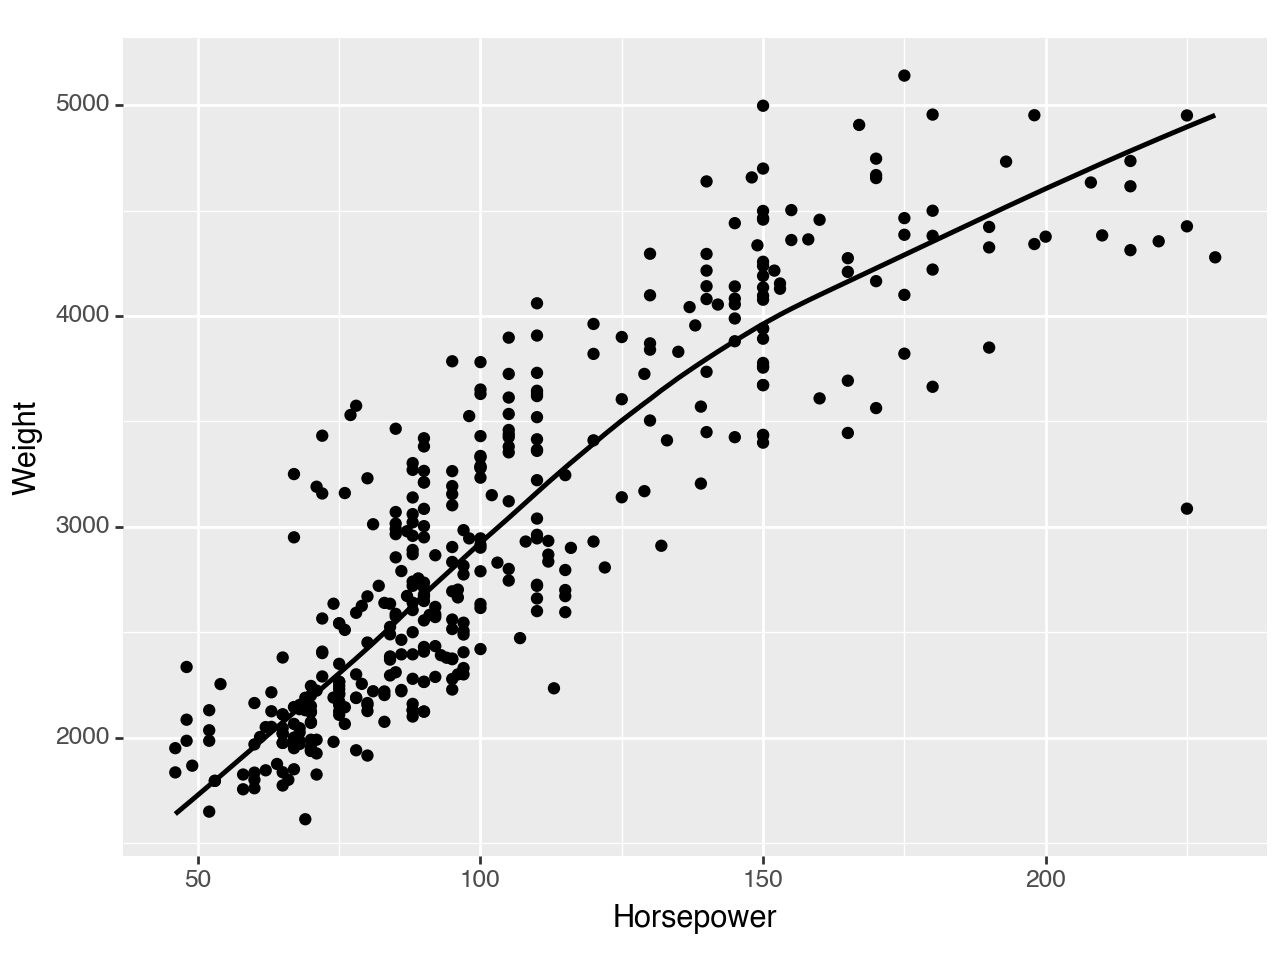

<Figure Size: (640 x 480)>

In [82]:
(ggplot(cars, aes(x='Horsepower', y='Weight')) 
 + geom_point()
 + geom_smooth()
)

However, you can also use a simple linear model (lm). This also gives a confidence band for the standard error.

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 6 rows containing missing values.


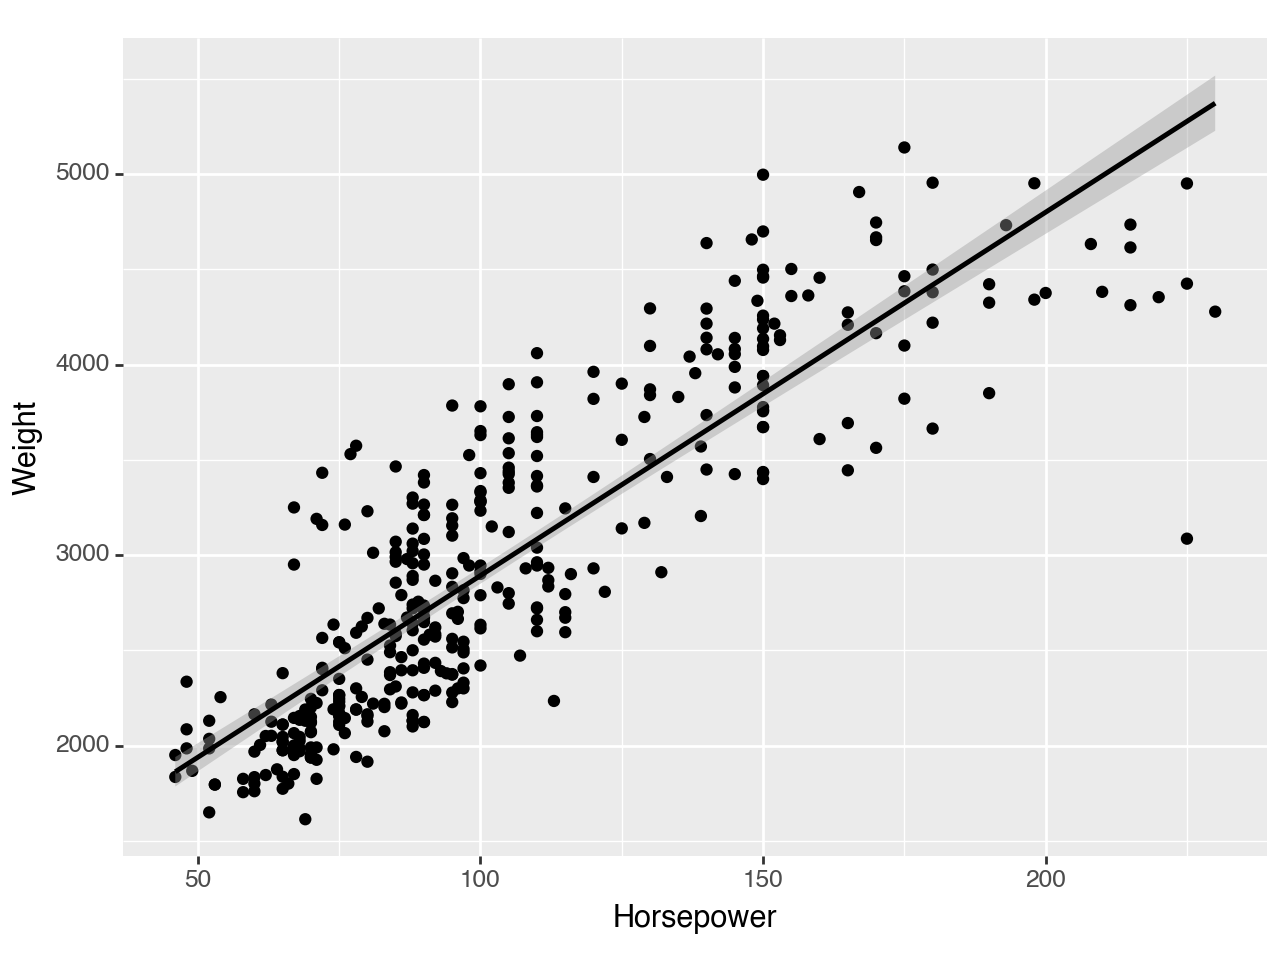

<Figure Size: (640 x 480)>

In [85]:
(ggplot(cars, aes(x='Horsepower', y='Weight')) 
 + geom_point()
 + geom_smooth(method='lm')
)

The model is fit for each group when we split the data by another variable.

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 6 rows containing missing values.


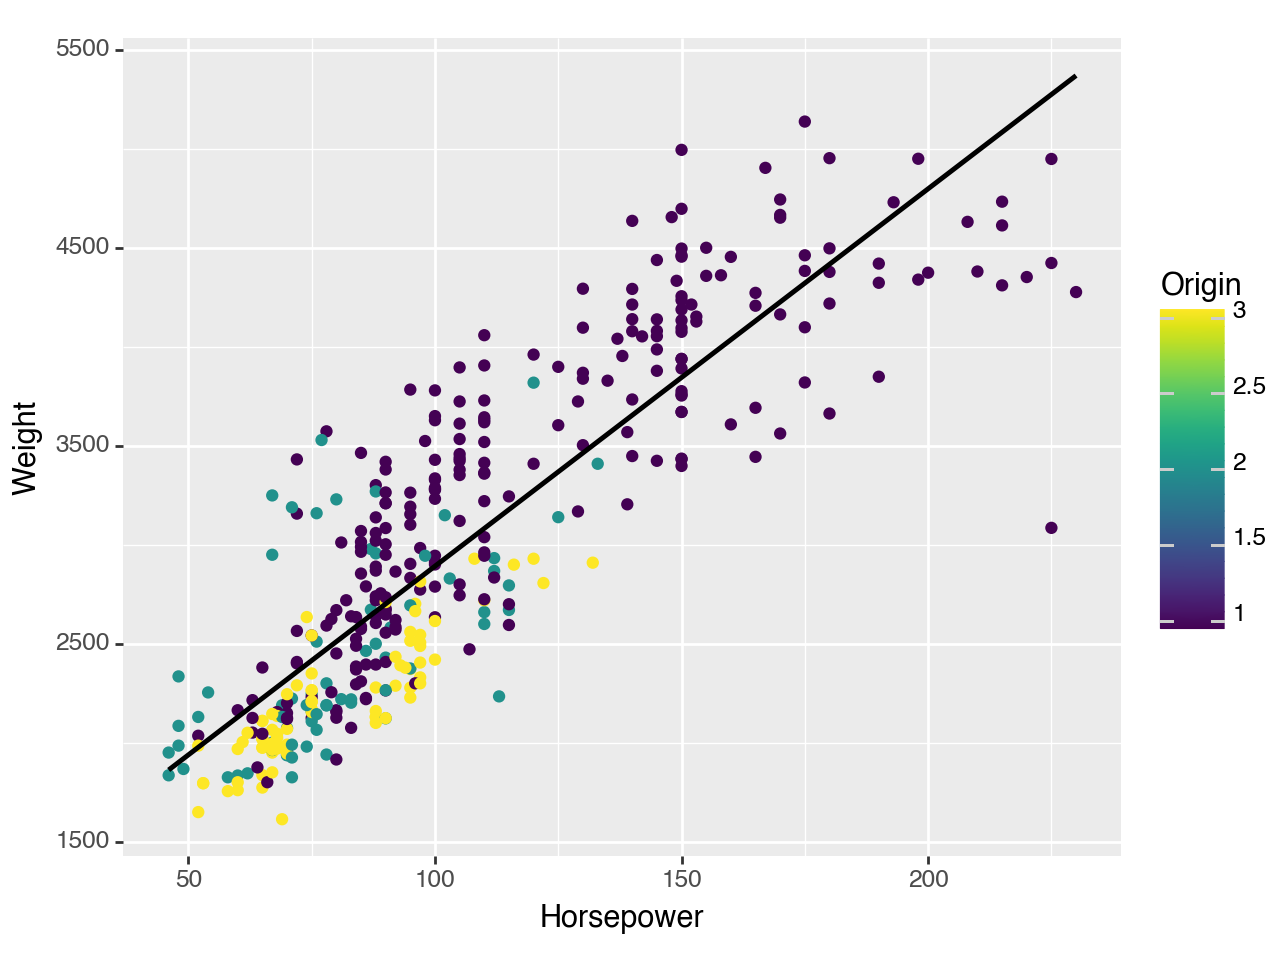

<Figure Size: (640 x 480)>

In [87]:
(ggplot(cars, aes(x='Horsepower', y='Weight', color='Origin')) 
 + geom_point()
 + geom_smooth(method='lm', se=False)
)

### Exercise

For the next exercise, we will take a look at the countries dataset that contains developmental indices for many countries of the world. Plot Literacy vs. GDP and fit a loess smoothed curve through the points. How do the variables relate?

In [89]:
#countries = pd.read_csv("data/countries.csv", index_col=0)
#countries.head()

Reveal the cell below for the solution

In [91]:
#ggplot(countries, aes(x="GDP", y="Literacy"))
#+ geom_point()
#+ geom_smooth()
#)

### More dimensions with more aesthetics
In fact we can combine quite a few more than just two variables on a two dimensional plot.

In [92]:
cars.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


We can add one more continuous variable, by mapping it to a color scale.

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 6 rows containing missing values.


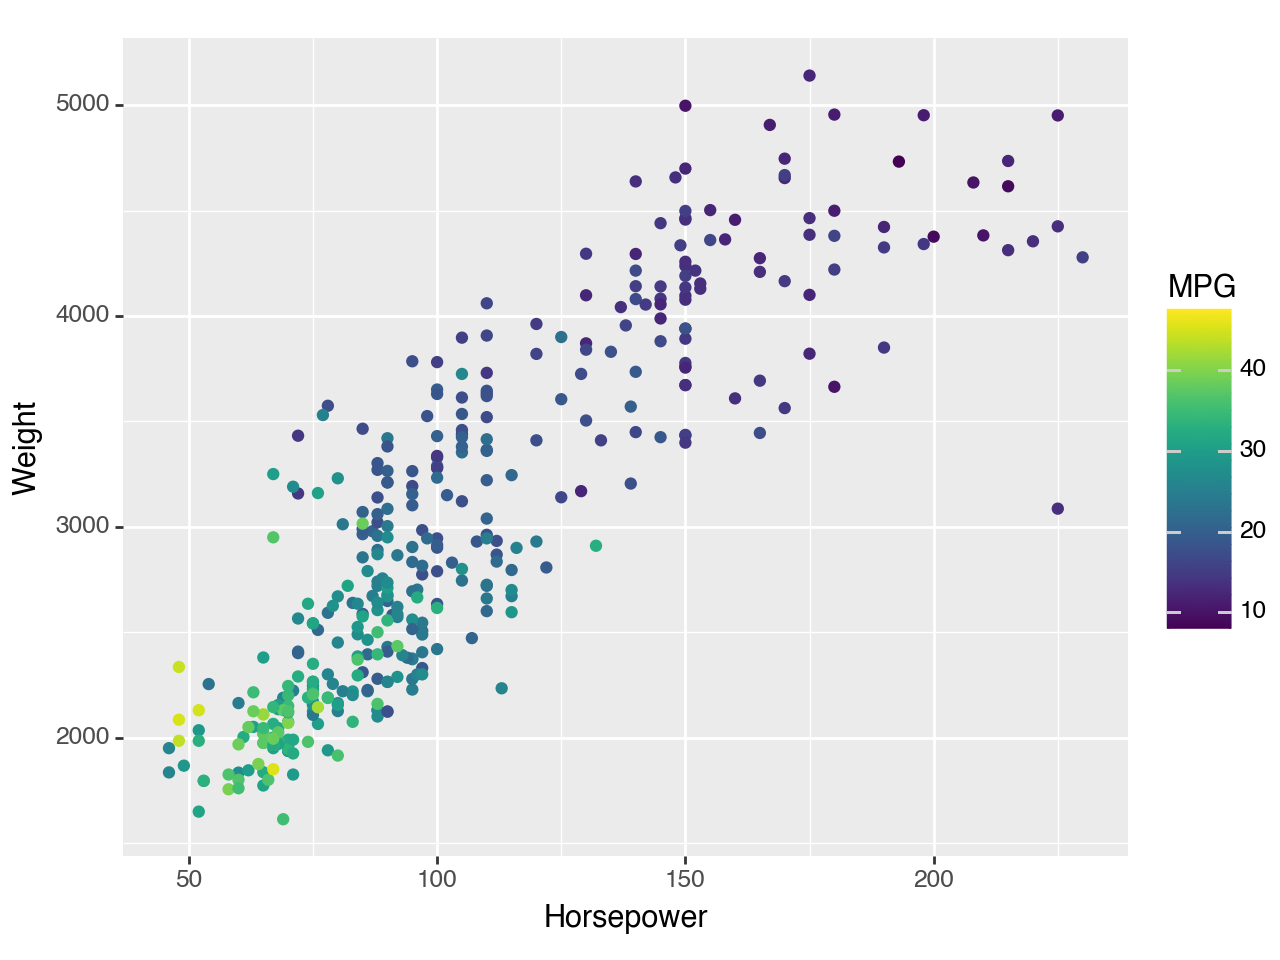

<Figure Size: (640 x 480)>

In [94]:
(ggplot(cars, aes(x='Horsepower', y='Weight', color='MPG')) 
 + geom_point()
)

We can add another continuous variable, by making the size of the markers proportional to its value. In this case we are showing the "Displacement" (Hubraum) which is the swept volume of all the pistons inside the cylinders of the engine.

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 6 rows containing missing values.


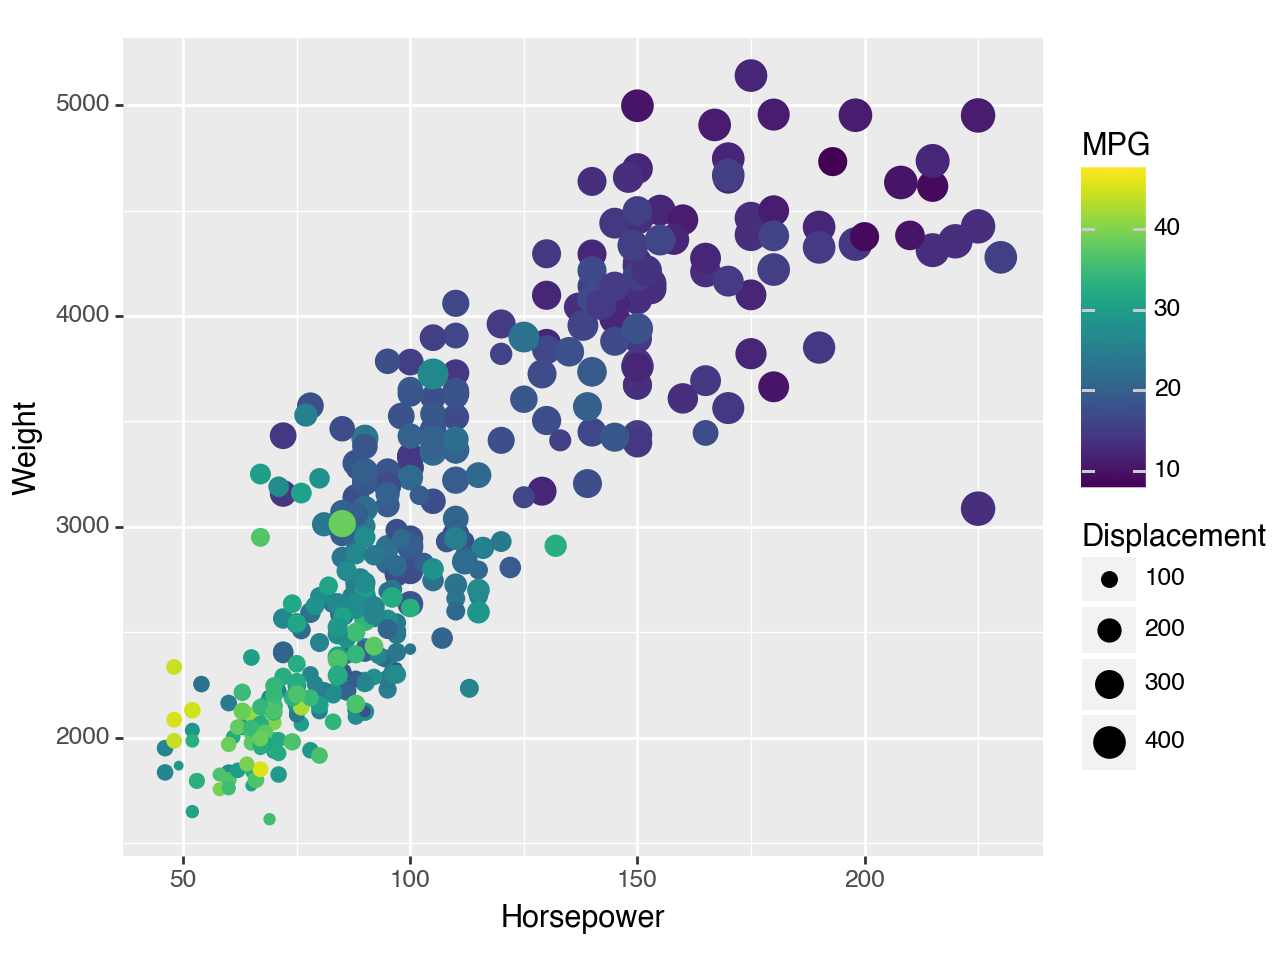

<Figure Size: (640 x 480)>

In [96]:
(ggplot(cars, aes(x='Horsepower', y='Weight', color='MPG', size='Displacement')) 
 + geom_point()
)

We can add another categorical variable by binding it to the shape aesthetic. This way we now have five different variables in our 2d plot.

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 6 rows containing missing values.


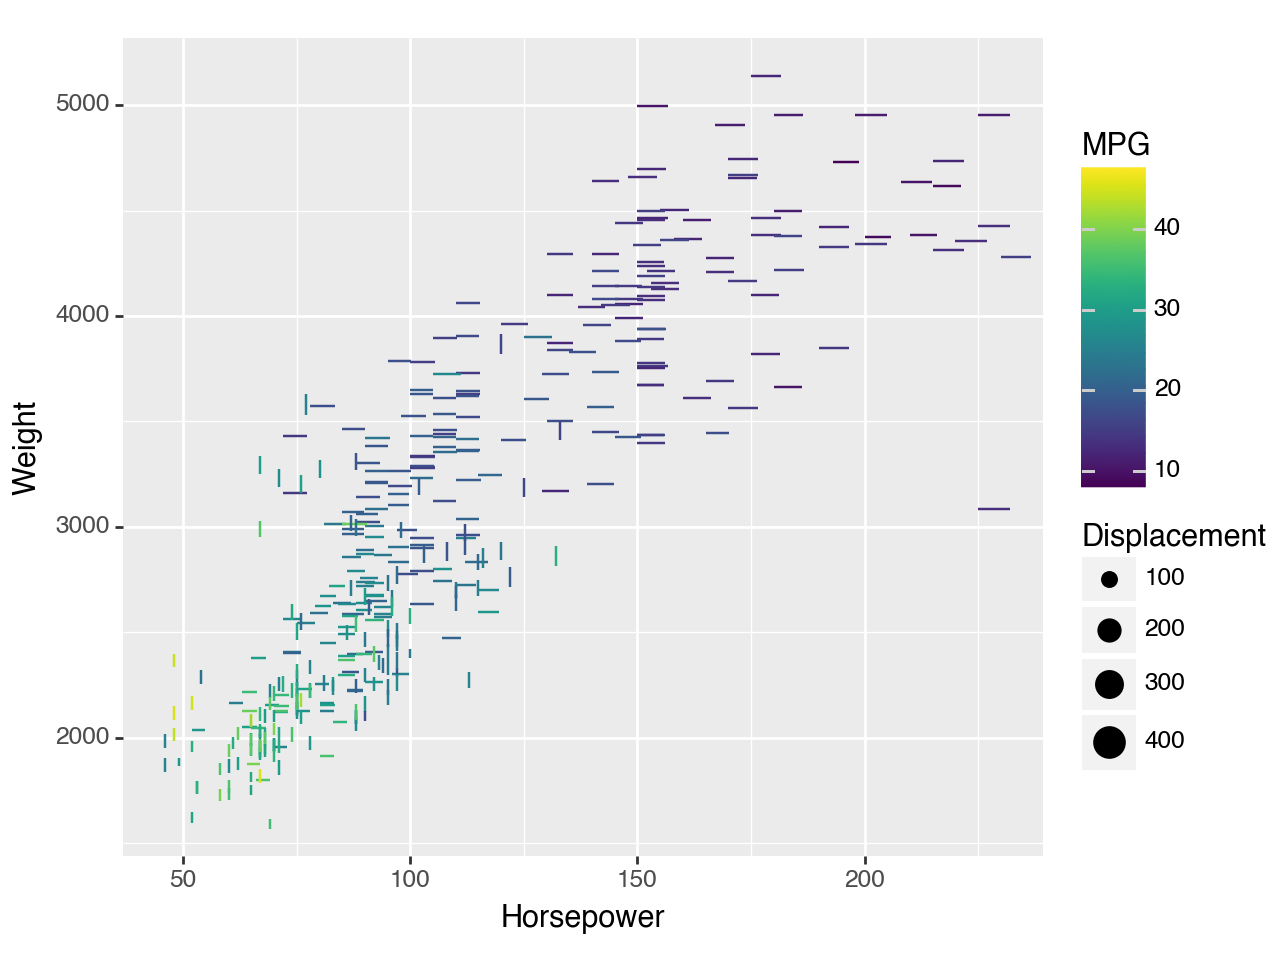

<Figure Size: (640 x 480)>

In [98]:
(ggplot(cars, aes(x='Horsepower', y='Weight', color='MPG', size='Displacement', shape='Origin')) 
 + geom_point()
)

Using multiple plots, we can even add the Cylinders variable. facet_wrap just puts all the plots next to one another, wrapping after a fixed number of columns.

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 6 rows containing missing values.


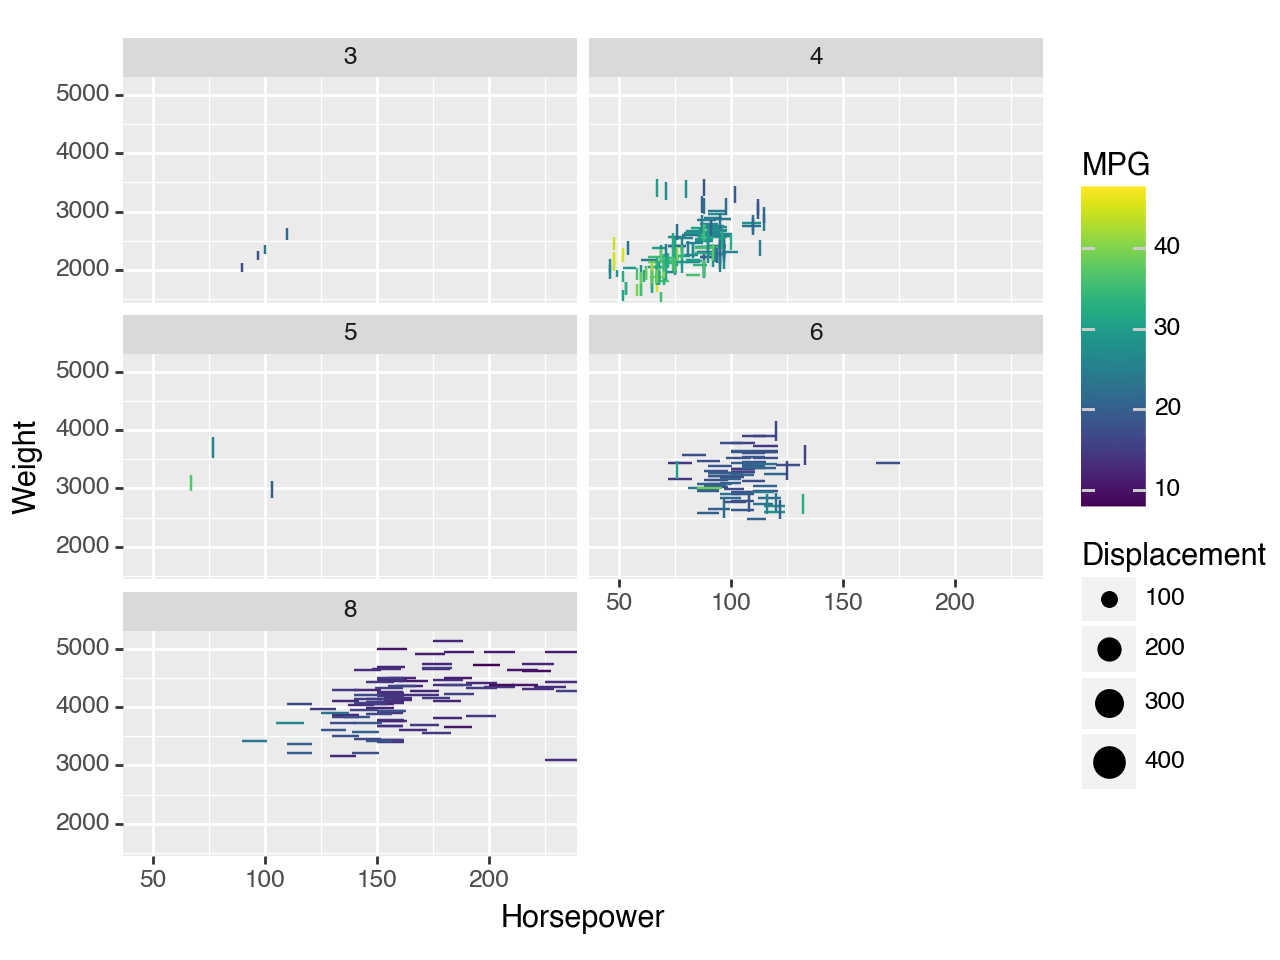

<Figure Size: (640 x 480)>

In [100]:
(ggplot(cars, aes(x='Horsepower', y='Weight', color='MPG', size='Displacement', shape='Origin')) 
 + geom_point()
 + facet_wrap('Cylinders', ncol=2)
)

In contrast to facet_wrap, facet_grid explicitly maps variables to rows and columns. Let's convert the Year to an int so it can be included in the grid.

In [103]:
cars['year_int'] = cars['Model Year']
cars['year_int'].value_counts()

year_int
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

Looking at the dataframe, we have almost included all variables in our plot except for Name and Acceleration. Since putting text labels to points does not make so much sense on this scale, we just add the Acceleration variable to the plot. To do this, we first have to turn in into a categorical variable.

In [104]:
cars['Acceleration'].describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: Acceleration, dtype: float64

In [105]:
cars['acceleration_cat'] = pd.qcut(cars['Acceleration'], q=3, labels=['slow', 'middle', 'fast'])
cars['acceleration_cat'].head()

0    slow
1    slow
2    slow
3    slow
4    slow
Name: acceleration_cat, dtype: category
Categories (3, object): ['slow' < 'middle' < 'fast']

Now we can extend one side of the facet grid with a combination of two variables.

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 6 rows containing missing values.
/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 6 rows containing missing values.


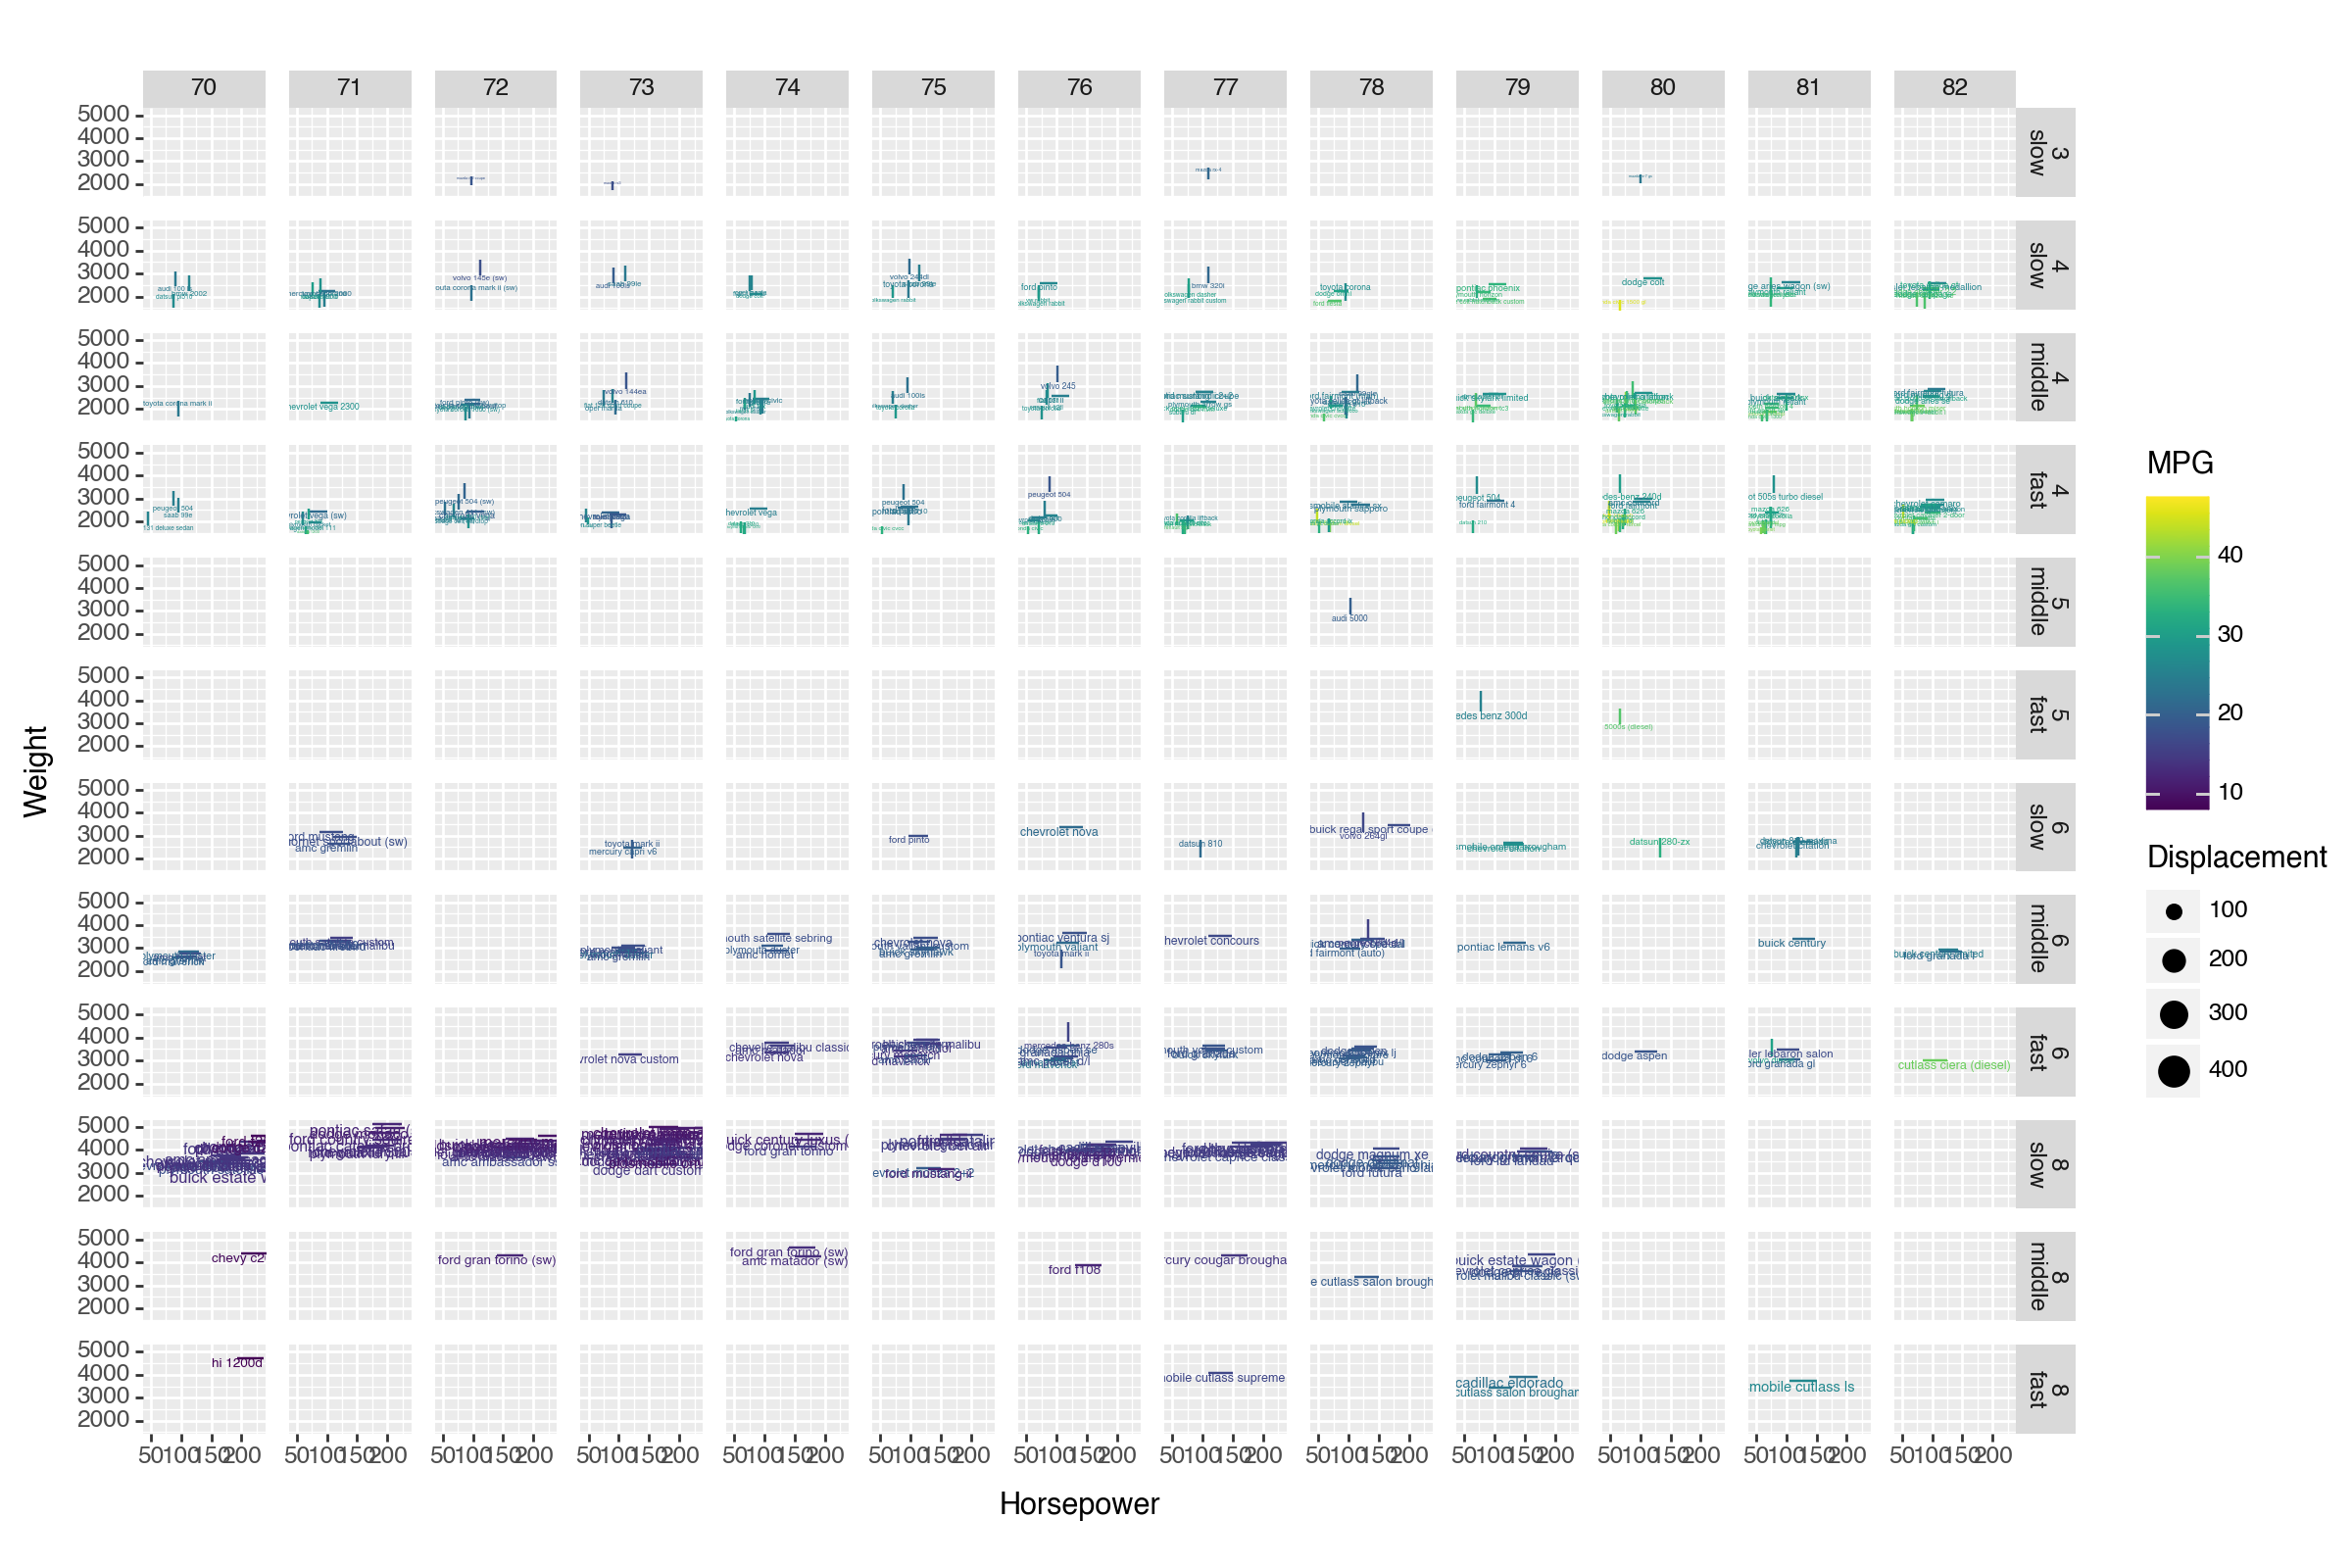

<Figure Size: (1200 x 800)>

In [108]:
(ggplot(cars, aes(x='Horsepower', y='Weight', color='MPG', size='Displacement', shape='Origin', label='Car Name')) 
 + geom_point()
 + facet_grid([['Cylinders', 'acceleration_cat' ], 'year_int'])   # R-Syntax would be 'Cylinders + acceleration_cat ~ year_int' (~ separating rows/cols, and + creating crossprod.)
 + theme(figure_size=(12, 8))                                     #                    (formular expression)
 + geom_text(va='top')
)

That's it! We combined eight variables in a single plot using only four lines of code!